<a href="https://colab.research.google.com/github/Pauladrea03/supervised-and-unsupervised-learning-project/blob/main/supervisado_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autores**
* Isabela Pareja Gil
* Juliana Rueda Arango
* Paula Andrea Ortega Sanjuan
* Jose David Martínez Espinosa



# Librerías

In [ ]:
!pip install scikit-optimizer
!pip install scikit-learn graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 963.1 kB/s eta 0:00:00


In [ ]:
# Librerías de manipulación de datos
import pandas as pd
import numpy as np


# Opciones de Pandas
pd.set_option('display.max_columns', None)


# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display
import plotly.express as px
import graphviz


# Librerías para estadística y pruebas
from scipy.stats import gaussian_kde, kstest, norm, shapiro, stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
import time
import math


# Librerías de machine learning y preprocesamiento
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.datasets import make_classification, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from scipy.stats import uniform, poisson
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,  f_classif, mutual_info_classif, chi2,RFE,SequentialFeatureSelector, SelectFromModel
from sklearn.model_selection import cross_val_score, KFold, cross_validate,RepeatedStratifiedKFold, RepeatedKFold, GridSearchCV, RandomizedSearchCV, train_test_split,validation_curve
from sklearn.pipeline import make_pipeline

# Librerías para métricas de modelos
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer, mean_squared_error
from sklearn import tree

import scipy.stats as stats
from scipy.stats import gaussian_kde, kstest, norm, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Cargar datos

In [ ]:
file_id="1uqi3tElBrgtzjjnQ67mY46TrNWmnDtGw"
df_algebra_vectorial = pd.read_csv(f'https://docs.google.com/uc?export=download&id={file_id}', sep = ';')
del df_algebra_vectorial["Unnamed: 0"]
df_algebra_vectorial.head(10)

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11,11
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,habilidad,padre,1,2,0,no,si,no,no,no,si,yes,no,5,3,3,1,1,3,2,9,11,11
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,otro,madre,1,2,0,si,no,no,no,si,si,yes,no,4,3,2,2,3,3,6,12,13,12
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,recomendacion,madre,1,3,0,no,si,no,si,si,si,yes,yes,3,2,2,1,1,5,0,14,14,14
4,II,M,16,U,mayor_3,J,3,3,otro,otro,recomendacion,padre,1,2,0,no,si,no,no,si,si,no,no,4,3,2,1,2,5,0,11,13,13
5,II,H,16,U,menor_e3,J,4,3,servicios,otro,reputacion,madre,1,2,0,no,si,no,si,si,si,yes,no,5,4,2,1,2,5,6,12,12,13
6,II,H,16,U,menor_e3,J,2,2,otro,otro,recomendacion,madre,1,2,0,no,no,no,no,si,si,yes,no,4,4,4,1,1,3,0,13,12,13
7,II,M,17,U,mayor_3,S,4,4,otro,profesor,recomendacion,madre,2,2,0,si,si,no,no,si,si,no,no,4,1,4,1,1,1,2,10,13,13
8,II,H,15,U,menor_e3,S,3,2,servicios,otro,recomendacion,madre,1,2,0,no,si,no,no,si,si,yes,no,4,2,2,1,1,1,0,15,16,17
9,II,H,15,U,mayor_3,J,3,4,otro,otro,recomendacion,madre,1,2,0,no,si,no,si,si,si,yes,no,5,5,1,1,1,5,0,12,12,13


# Análisis exploratorio y limpieza de datos

*Descripción de los datos*

In [ ]:
def visual_check(df):

    print('Shape:\n',df.shape,'\n')

    print('Data Types:\n', df.dtypes,'\n\n')

    df_colum_duplicated=df.columns.duplicated()
    print("Columnas duplicadas:\n",df_colum_duplicated,'\n\n')

    df_fil_duplicated=df.duplicated()
    print("Filas duplicadas:\n",df_fil_duplicated,'\n\n')

    df_colum_faltantes=df.columns[df.isnull().any()]
    print("Datos faltantes por columnas:\n",df_colum_faltantes,'\n\n')

    numerical_columns = df.select_dtypes(include=['number'])
    display(numerical_columns.describe().T)

visual_check(df_algebra_vectorial)

Shape:
 (651, 33) 

Data Types:
 departamento          object
sexo                  object
edad                   int64
direccion             object
t_familia             object
padres_status         object
madre_edu              int64
padre_edu              int64
madre_trab            object
padre_trab            object
razon                 object
guardian              object
t_examen               int64
t_estudio              int64
faltas                 int64
soporte_edu_extra     object
soporte_edu_fam       object
monitores             object
actividades_extra     object
preuniversitario      object
postgrado             object
internet              object
relacion_sen          object
relacion_fam           int64
tiempo_libre           int64
salir_amigos           int64
cons_alcohol_sem       int64
cons_alcohol_finde     int64
salud                  int64
ausencias              int64
nota_01                int64
nota_02                int64
nota_03                int64
dtype: obj

,count,mean,std,min,25%,50%,75%,max
edad,651.0,16.745008,1.217609,15.0,16.0,17.0,18.0,22.0
madre_edu,651.0,2.516129,1.134481,0.0,2.0,2.0,4.0,4.0
padre_edu,651.0,2.308756,1.100308,0.0,1.0,2.0,3.0,4.0
t_examen,651.0,1.569892,0.747889,1.0,1.0,1.0,2.0,4.0
t_estudio,651.0,1.930876,0.828241,1.0,1.0,2.0,2.0,4.0
faltas,651.0,0.221198,0.592449,0.0,0.0,0.0,0.0,3.0
relacion_fam,651.0,3.930876,0.954253,1.0,4.0,4.0,5.0,5.0
tiempo_libre,651.0,3.181260,1.049990,1.0,3.0,3.0,4.0,5.0
salir_amigos,651.0,3.187404,1.174824,1.0,2.0,3.0,4.0,5.0
cons_alcohol_sem,651.0,1.500768,0.923830,1.0,1.0,1.0,2.0,5.0


La base de datos está compuesta por 651 filas y 33 columnas, de las cuales encontramos algunas numéricas y categóricas (como object).

En este caso se observan dos filas duplicadas, sin embargo la base de datos no incluye un identificador por persona, por lo tanto no es posible conocer si realmente se está repitiendo la misma persona. No se eliminan los duplicados bajo el supuesto de que pueden existir dos personas con el mismo registro de datos en esta base.

La base de datos no presenta faltantes.

### **Análisis univariado**

#### ***1. Variables númericas***

In [ ]:
#Conocer los valores que tienen las variables numéricas
numerical_columns = df_algebra_vectorial.select_dtypes(include=['number'])

for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'edad':
[18 17 15 16 19 22 20 21]


Valores únicos en la columna 'madre_edu':
[4 1 3 2 0]


Valores únicos en la columna 'padre_edu':
[4 1 2 3 0]


Valores únicos en la columna 't_examen':
[2 1 3 4]


Valores únicos en la columna 't_estudio':
[2 3 1 4]


Valores únicos en la columna 'faltas':
[0 3 1 2]


Valores únicos en la columna 'relacion_fam':
[4 5 3 1 2]


Valores únicos en la columna 'tiempo_libre':
[3 2 4 1 5]


Valores únicos en la columna 'salir_amigos':
[4 3 2 1 5]


Valores únicos en la columna 'cons_alcohol_sem':
[1 2 5 3 4]


Valores únicos en la columna 'cons_alcohol_finde':
[1 3 2 4 5]


Valores únicos en la columna 'salud':
[3 5 1 2 4]


Valores únicos en la columna 'ausencias':
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]


Valores únicos en la columna 'nota_01':
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]


Valores únicos en la columna 'nota_02':
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]


Val

Se considera que hay variables númericas que realmente representan categorías, por lo cual se realiza la respectiva conversión de las siguientes variables:

*  *relacion_fam*
*  *salud*
*  *tiempo_libre*
*  *salir_amigos*
*  *cons_alcohol_sem*
*  *cons_alcohol_finde*
*  *madre_edu*
*  *padre_edu*
*  *t_examen*
*  *t_estudio*

Adicionalmente, a las variables *'internet'* y *'relacion_sen'* se les ajustó el valor de 'yes' a 'si', a la variable 'departamento' se le ajustaron los nombres de las carreras y finalmente, la variable *'faltas'*, con valores entre 0 y 3, se reacondicionó para que cumpliera con su definición, expedida en el diccionario de variables: **n si 1<=n<3, si no 4**, los valores de 0 se reemplazaron por 4.


In [ ]:
#Conversión de las variable núméricas a categóricas

def cambio_categoria(df):
    categoricas_1 =['relacion_fam', 'salud']
    categoricas_2 = ['tiempo_libre', 'salir_amigos', 'cons_alcohol_sem', 'cons_alcohol_finde']

    conversion_1 = {
        1: 'Muy malo',
        2: 'Malo',
        3: 'Regular',
        4: 'Bueno',
        5: 'Excelente'
    }
    conversion_2 = {
        1: 'Muy bajo',
        2: 'Bajo',
        3: 'Medio',
        4: 'Alto',
        5: 'Muy alto'
    }
    conversion_padres_edu = {
        0: 'Ninguno',
        1: 'Primaria hasta 5°',
        2: '6° a 9°',
        3: '10° a 11°',
        4: 'Educación superior'
    }
    conversion_t_examen = {
        1: 'menos 15 min',
        2: '15 a 30 min',
        3: '30 min a 1 hora',
        4: 'mas 1 hora'
    }
    conversion_t_estudio = {
        1: 'menos 2 horas',
        2: '2 a 5 horas',
        3: '5 a 10 horas',
        4: 'mas 10 horas'
    }
    conversion_yes = {
        'yes': 'si'
    }


    for col in df.columns:
        if col in categoricas_1:
            df[col] = df[col].replace(conversion_1)
        elif col in categoricas_2:
            df[col]= df[col].replace(conversion_2)
        elif col == 'madre_edu' or col =='padre_edu':
            df[col]= df[col].replace(conversion_padres_edu)
        elif col == 't_examen':
            df[col] = df[col].replace(conversion_t_examen)
        elif col == 't_estudio':
            df[col] = df[col].replace(conversion_t_estudio)
        elif col == 'internet' or col == 'relacion_sen':
            df[col] = df[col].replace(conversion_yes)
        elif col == 'faltas':
            df[col] = df[col].replace(0, 4)
        elif col == 'departamento':
            df[col] = df[col].replace('MS', 'IS')

    return df

df_algebra_vectorial = cambio_categoria(df_algebra_vectorial)
df_algebra_vectorial.head()

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,Educación superior,Educación superior,en_casa,profesor,habilidad,madre,15 a 30 min,2 a 5 horas,4,si,no,no,no,si,si,no,no,Bueno,Medio,Alto,Muy bajo,Muy bajo,Regular,4,0,11,11
1,II,M,17,U,mayor_3,J,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,padre,menos 15 min,2 a 5 horas,4,no,si,no,no,no,si,si,no,Excelente,Medio,Medio,Muy bajo,Muy bajo,Regular,2,9,11,11
2,II,M,15,U,menor_e3,J,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,madre,menos 15 min,2 a 5 horas,4,si,no,no,no,si,si,si,no,Bueno,Medio,Bajo,Bajo,Medio,Regular,6,12,13,12
3,II,M,15,U,mayor_3,J,Educación superior,6° a 9°,salud,servicios,recomendacion,madre,menos 15 min,5 a 10 horas,4,no,si,no,si,si,si,si,si,Regular,Bajo,Bajo,Muy bajo,Muy bajo,Excelente,0,14,14,14
4,II,M,16,U,mayor_3,J,10° a 11°,10° a 11°,otro,otro,recomendacion,padre,menos 15 min,2 a 5 horas,4,no,si,no,no,si,si,no,no,Bueno,Medio,Bajo,Muy bajo,Bajo,Excelente,0,11,13,13


**Análisis exploratorio**

In [ ]:
numerical_columns = df_algebra_vectorial.select_dtypes(include=['number'])

for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'edad':
[18 17 15 16 19 22 20 21]


Valores únicos en la columna 'faltas':
[4 3 1 2]


Valores únicos en la columna 'ausencias':
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]


Valores únicos en la columna 'nota_01':
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]


Valores únicos en la columna 'nota_02':
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]


Valores únicos en la columna 'nota_03':
[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]





*   La columna edad presenta valores entre 15 y 22 años.
*   Se encuentran faltas entre 1 y 3, el valor 4 hace alusión a faltas que no se encuentran entre el rango 1-3.
*   Ausencias tiene valores entre 0 y 30.
*   nota_01, nota_2 y nota_3 tienen valores entre 0 y 19.

***Análisis univariado con gráficos***

In [ ]:
def num_vis(df):
    numeric_columns = df.select_dtypes(include='number').columns
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)
    fig_hist.update_layout(height=300 * n_rows, width=800, title_text="Histogramas variables numéricas")
    fig_hist.show()

num_vis(df_algebra_vectorial)

La variable independiente edad tiene una mayor concentración de valores entre 0 y 19 años, es decir, las personas entre 0 y 19 son la población más grande encontrada en la materia álgebra vectorial. Por otro lado, es notable que la variable faltas tiene un gran desbalance en sus valores, pues la mayoría de estudiantes presentan 4 faltas. En Ausencias se identifica que solo pocos estudiantes se han ausentado más de 11 veces aproximadamente. Las notas presentan mayor acumulación, entre 8 y 15 aproximadamente, es decir, la mayoría de los estudiantes consiguen notas entre este rango.

#### ***2. Variables categoricas***

In [ ]:
def cat_summary(df, cat, plot=False):
    print(pd.DataFrame({cat: df[cat].value_counts(),
                        'Ratio': 100 * df[cat].value_counts() / len(df)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=df[cat], data=df)
        plt.show(block=True)

cat_cols = [col for col in df_algebra_vectorial.columns if df_algebra_vectorial[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(df_algebra_vectorial, col, plot=False)

              departamento      Ratio
departamento                         
II                     424  65.130568
IS                     227  34.869432
##########################################
      sexo      Ratio
sexo                 
M      385  59.139785
H      266  40.860215
##########################################
           direccion      Ratio
direccion                      
U                453  69.585253
R                198  30.414747
##########################################
           t_familia      Ratio
t_familia                      
mayor_3          459  70.506912
menor_e3         192  29.493088
##########################################
               padres_status      Ratio
padres_status                          
J                        570  87.557604
S                         81  12.442396
##########################################
                    madre_edu      Ratio
madre_edu                               
6° a 9°                   187  28.725038
Educac

La base de datos contiene 25 variables categóricas, de las cuales se realizan las siguientes observaciones.

* La educación que los padres y madres de los estudiantes del curso recibieron, fue mayoritariamente de 6° a 9°, resaltando que fueron las mujeres quienes recibieron más educación superior con un 27%. Por otro lado, en cuanto al ámbito laboral se destaca la categoría otros, sin embargo, son las mujeres las que más permanecen en el hogar, lo que podría explicar el porqué las madres son el guardian designado con mayor proporción. El 87% de las parejas padres de familia del curso, se encuentran en unión.

*  Un 47% de los estudiantes dedican de 2 a 5 horas de estudio, y la mayoría no tienen monitores para clases extra. En cuanto a actividades extracurriculares, los estudiantes se encuentran repartidos en casi que iguales proporciones, ganando que no realizan actividades extra por un 2.92.

* Así como el tiempo de estudio parece ser medio, los estudiantes tienen una vida social o salidas con amigos también de frecuencia media o baja, lo que también se refleja en la cantidad de estudiantes con pareja sentimental, pues un 63% no posee. Es importante destacar que el consumo de alcohol de los estudiantes es muy bajo, tanto en semana como el fin de semana.

* La salud de los estudiantes refleja que la mayoría tiene entre medio y excelente condición, lo que podría tener relación con el bajo consumo de alcohol presentado.

**Análisis univariado con gráficos**

En este análisis gráfico, debido a la extensividad de las variables categóricas, se seleccionan tres tipos de gráficos diferentes, elegidos según la mejor visualización que podría tener la categoría.

In [ ]:
fig = make_subplots(rows=2, cols=4,
                    subplot_titles=("<b>Relación Familiar<b>",
                                    "<b>Trabajo del Padre<b>",
                                    "<b>Trabajo de la Madre<b>",
                                    "<b>Tiempo libre después<br>de la universidad<b>",
                                    "<b>Consumo de alcohol<br>en jornada laboral<b>",
                                    "<b>Consumo de alcohol<br>en fin de semana<b>",
                                    "<b>Estado de salud actual<b>",
                                    "<b>Salir amigos<b>"))

# Datos para 'relacion_fam'
base_relacion_fam = df_algebra_vectorial.groupby(['relacion_fam'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'relacion_fam'
fig.add_trace(go.Bar(x=base_relacion_fam['count'], y=base_relacion_fam['relacion_fam'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=1)

# Datos para 'padre_trab'
base_padre_trab = df_algebra_vectorial.groupby(['padre_trab'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'padre_trab'
fig.add_trace(go.Bar(x=base_padre_trab['count'], y=base_padre_trab['padre_trab'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=2)

# Datos para 'madre_trab'
base_madre_trab = df_algebra_vectorial.groupby(['madre_trab'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'madre_trab'
fig.add_trace(go.Bar(x=base_madre_trab['count'], y=base_madre_trab['madre_trab'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=3)

# Datos para 'tiempo_libre'
base_tiempo_libre = df_algebra_vectorial.groupby(['tiempo_libre'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'tiempo_libre'
fig.add_trace(go.Bar(x=base_tiempo_libre['count'], y=base_tiempo_libre['tiempo_libre'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=4)

# Datos para 'cons_alcohol_sem'
base_cons_alcohol_sem = df_algebra_vectorial.groupby(['cons_alcohol_sem'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'cons_alcohol_sem'
fig.add_trace(go.Bar(x=base_cons_alcohol_sem['count'], y=base_cons_alcohol_sem['cons_alcohol_sem'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=1)

# Datos para 'cons_alcohol_finde'
base_cons_alcohol_finde = df_algebra_vectorial.groupby(['cons_alcohol_finde'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'cons_alcohol_finde'
fig.add_trace(go.Bar(x=base_cons_alcohol_finde['count'], y=base_cons_alcohol_finde['cons_alcohol_finde'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=2)

# Datos para 'salud'
base_salud = df_algebra_vectorial.groupby(['salud'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'salud'
fig.add_trace(go.Bar(x=base_salud['count'], y=base_salud['salud'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=3)

# Datos para 'salir_amigos'
base_salir_amigos = df_algebra_vectorial.groupby(['salir_amigos'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'salir_amigos'
fig.add_trace(go.Bar(x=base_salir_amigos['count'], y=base_salir_amigos['salir_amigos'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=4)

# Personalización de la figura
fig.update_layout(height=800, width=1500)

# Mostrar el gráfico
fig.show()

Para estas graficas de barras, donde el eje x es la cantidad de estudiantes y el eje y la categoría, se encuentra que:

* El consumo de alcohol en jornada laboral es muy bajo con 453 estudiantes, sin embargo los fines de semana solo 249 clasifican como muy bajo.

* La misma cantidad de madres trabaja en servicios o se queda en casa, mientras que en los padres solo 42 se quedan en casa.

* El tiempo libre después de la universidad, para los estudiantes, es medio, así como sus salidas con amigos.

* La relación familiar es generalmente buena en los hogares de los estudiantes.

In [ ]:
# Crear la figura con subplots y especificar el número de filas y columnas
fig = make_subplots(rows=3, cols=3, subplot_titles=(
        "<b>% de estudiantes que tienen<br>una relación romántica<b>",
        "<b>% de estudiantes que tienen<br>acceso a internet en casa<b>",
        "<b>% de estudiantes que quieren<br>realizar postgrado<b>",
        "<b>% de estudiantes que asistieron<br>a preuniversitario<b>",
        "<b>% de estudiantes que participan<br>en actividades extraescolares<b>",
        "<b>% de estudiantes que tienen clases<br>extras pagadas por tutores privados<b>",
        "<b>% de estudiantes que tienen<br>apoyo educativo familiar<b>",
        "<b>% de estudiantes que tienen<br>apoyo educativo adicional<b>"
    ),
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
     [{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
      [{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]],
    vertical_spacing=0.15,
    horizontal_spacing=0.1)

# Definir los gráficos de torta y añadirlos a los subplots

# Gráfico 1: Relación romántica
base = df_algebra_vectorial.groupby(['relacion_sen'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='relacion_sen',hole=.5).data[0], row=1, col=1)

# Gráfico 2: Acceso a internet en casa
base = df_algebra_vectorial.groupby(['internet'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='internet',hole=.5).data[0], row=1, col=2)

# Gráfico 3: Quieren realizar postgrado
base = df_algebra_vectorial.groupby(['postgrado'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='postgrado', hole=.5).data[0], row=1, col=3)

# Gráfico 4: Asistencia a preuniversitario
base = df_algebra_vectorial.groupby(['preuniversitario'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='preuniversitario',hole=.5).data[0], row=2, col=1)

# Gráfico 5: Actividades extraescolares
base = df_algebra_vectorial.groupby(['actividades_extra'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='actividades_extra',hole=.5).data[0], row=2, col=2)

# Gráfico 6: Clases extras pagadas por tutores privados
base = df_algebra_vectorial.groupby(['monitores'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='monitores',hole=.5).data[0], row=2, col=3)

# Gráfico 7: Apoyo educativo familiar
base = df_algebra_vectorial.groupby(['soporte_edu_fam'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='soporte_edu_fam',hole=.5).data[0], row=3, col=1)

# Gráfico 8: Apoyo educativo adicional
base = df_algebra_vectorial.groupby(['soporte_edu_extra'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='soporte_edu_extra',hole=.5).data[0], row=3, col=2)

# Personalizar el diseño de la figura
fig.update_layout(height=1000, width=1500, template='simple_white')

# Mostrar la figura
fig.show()

Para las variables binarias se eligió un gráfico de pie, pues permite una mejor visualización de porcentajes y la proporción de las respuestas.

* Aunque el 84% de los estudiantes no tienen un soporte educativo adicional, la mayoría sí tiene soporte educativo familiar, lo que podría estar relacionado a la buena relación familiar.

* Es importante destacar que casi el 90% de los estudiantes quisieran estudiar un posgrado al finalizar la carrera.

* Para entrar a la universidad, la mayoría de los estudiantes optaron por realizar un preuniversitario.

In [ ]:
fig = make_subplots(
    rows=3, cols=4,
    subplot_titles=(
        "<b>Tutor del estudiante<b>",
        "<b>Razón para elegir la carrera<b>",
        "<b>Sexo del estudiante<b>",
        "<b>Tamaño de la familia<b>",
        "<b>Dirección<b>",
        "<b>Tiempo de estudio semanal<b>",
        "<b>Tiempo que demoró en<br>realizar el primer examen<b>",
        "<b>Departamento<b>",
        "<b>Educacion del padre<b>",
        "<b>Educación de la madre<b>",
        "<b>Estado de convivencia<br>de los padres<b>"
    ),
    vertical_spacing=0.25,
    horizontal_spacing=0.1
)

# Gráfico 1: Tutor del estudiante
base = df_algebra_vectorial.groupby(['guardian'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar1 = px.bar(base, x='guardian', y='count', barmode='group')
for trace in fig_bar1.data:
    fig.add_trace(trace, row=1, col=1)

# Gráfico 2: Razón para elegir la carrera
base = df_algebra_vectorial.groupby(['razon'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar2 = px.bar(base, x='razon', y='count', barmode='group')
for trace in fig_bar2.data:
    fig.add_trace(trace, row=1, col=2)

# Gráfico 3: Sexo del estudiante
base = df_algebra_vectorial.groupby(['sexo'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar3 = px.bar(base, x='sexo', y='count', barmode='group')
for trace in fig_bar3.data:
    fig.add_trace(trace, row=1, col=3)

# Gráfico 4: Tamaño de la familia
base = df_algebra_vectorial.groupby(['t_familia'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar4 = px.bar(base, x='t_familia', y='count', barmode='group')
for trace in fig_bar4.data:
    fig.add_trace(trace, row=1, col=4)

# Gráfico 5: Dirección
base = df_algebra_vectorial.groupby(['direccion'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar5 = px.bar(base, x='direccion', y='count', barmode='group')
for trace in fig_bar5.data:
    fig.add_trace(trace, row=2, col=1)

# Gráfico 6: Tiempo de estudio semanal
base = df_algebra_vectorial.groupby(['t_estudio'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar6 = px.bar(base, x='t_estudio', y='count', barmode='group')
for trace in fig_bar6.data:
    fig.add_trace(trace, row=2, col=2)

# Gráfico 7: Tiempo que demoró en realizar el primer examen
base = df_algebra_vectorial.groupby(['t_examen'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar7 = px.bar(base, x='t_examen', y='count', barmode='group')
for trace in fig_bar7.data:
    fig.add_trace(trace, row=2, col=3)

# Gráfico 8: departamento
base = df_algebra_vectorial.groupby(['departamento'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar8 = px.bar(base, x='departamento', y='count', barmode='group')
for trace in fig_bar8.data:
    fig.add_trace(trace, row=2, col=4)

# Gráfico 9: Educación del padre
base = df_algebra_vectorial.groupby(['padre_edu'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar9 = px.bar(base, x='padre_edu', y='count', barmode='group')
for trace in fig_bar9.data:
    fig.add_trace(trace, row=3, col=1)

# Gráfico 10: Educación de la madre
base = df_algebra_vectorial.groupby(['madre_edu'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar10 = px.bar(base, x='madre_edu', y='count', barmode='group')
for trace in fig_bar10.data:
    fig.add_trace(trace, row=3, col=2)

# Gráfico 11: Estado de convivencia de los padres
base = df_algebra_vectorial.groupby(['padres_status'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar11 = px.bar(base, x='padres_status', y='count', barmode='group')
for trace in fig_bar11.data:
    fig.add_trace(trace, row=3, col=3)

# Personalización de la figura
fig.update_layout(height=1000, width=1500)

# Mostrar el gráfico
fig.show()

En estos gráficos de barras se encuentra lo siguiente:

* La educación del padre, conforme aumenta el grado de estudio, disminuye la cantidad de padres que pudieron acceder a mejor educación.

* 424 estudiantes de 651 que ven el curso, pertenecen al pregrado de ingeniería industrial

#### *3. Variable respuesta*

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=df_algebra_vectorial['nota_03'], name='Histograma de la variable respuesta', marker_color='skyblue'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df_algebra_vectorial['nota_03'], name='Boxplot de la variable respuesta', marker_color='skyblue'),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribución de la variable respuesta",
    template='simple_white')
fig.show()

La variable respuesta para este modelo de regresión lineal múltiple es *'nota_03'*. Esta variable dependiente representa la puntuación del tercer examen de los estudiantes de ingeniería industral e ingeniería de sistemas en álgebra vectorial.

En el histograma se puede notar que esta variable cuenta con un sesgo a la izquierda, la mayoría de sus valores se encuentran al rededor de 11 o 12, hay pocas notas por debajo de 5 y por encima de 17. Además, según el boxplot, el rango intercuartilico se extiende de 10 a 14, lo que indica que el 50% de los datos se encuentran en este rango.

### **Análisis bivariado**

In [ ]:
df_algebra_vectorial.columns

Index(['departamento', 'sexo', 'edad', 'direccion', 't_familia',
       'padres_status', 'madre_edu', 'padre_edu', 'madre_trab', 'padre_trab',
       'razon', 'guardian', 't_examen', 't_estudio', 'faltas',
       'soporte_edu_extra', 'soporte_edu_fam', 'monitores',
       'actividades_extra', 'preuniversitario', 'postgrado', 'internet',
       'relacion_sen', 'relacion_fam', 'tiempo_libre', 'salir_amigos',
       'cons_alcohol_sem', 'cons_alcohol_finde', 'salud', 'ausencias',
       'nota_01', 'nota_02', 'nota_03'],
      dtype='object')

In [ ]:
fig = make_subplots(
    rows=3, cols=5,
    subplot_titles=(
        "<b>Puntuación del tercer examen<br>según el tamaño de la<br>familia del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la educación de la<br>madre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la educación del<br>padre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según el trabajo de la<br>madre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según el trabajo del<br>padre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la razón para<br>elegir la carrera<b>",
        "<b>Puntuación del tercer examen<br>según el tipo de guardian<br>del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo usado para<br>el primer exámen<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo de estudio<br>semanal<b>",
        "<b>Puntuación del tercer examen<br>según la calidad de la relación<br>familiar de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo libre después de la<br>universidad de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según la frecuencia con que el estudiante<br>sale con los amigos<b>",
        "<b>Puntuación del tercer examen<br>según el consumo de alcohol<br>en jornada laboral de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el consumo de alcohol<br>en fines de semana de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el estado de salud<br>actual de los estudiantes<b>",
    ),
    vertical_spacing=0.2,
    horizontal_spacing=0.1
)

# Gráfico 1: t_familia
fig_box1 = px.box(df_algebra_vectorial, x='t_familia', y='nota_03')
for trace in fig_box1.data:
    fig.add_trace(trace, row=1, col=1)

# Gráfico 2: madre_edu
fig_box2 = px.box(df_algebra_vectorial, x='madre_edu', y='nota_03')
for trace in fig_box2.data:
    fig.add_trace(trace, row=1, col=2)

# Gráfico 3: padre_edu
fig_box3 = px.box(df_algebra_vectorial, x='padre_edu', y='nota_03')
for trace in fig_box3.data:
    fig.add_trace(trace, row=1, col=3)

# Gráfico 4: madre_trab
fig_box4 = px.box(df_algebra_vectorial, x='madre_trab', y='nota_03')
for trace in fig_box4.data:
    fig.add_trace(trace, row=1, col=4)

# Gráfico 5: padre_trab
fig_box5 = px.box(df_algebra_vectorial, x='padre_trab', y='nota_03')
for trace in fig_box5.data:
    fig.add_trace(trace, row=1, col=5)

# Gráfico 6: razon
fig_box6 = px.box(df_algebra_vectorial, x='razon', y='nota_03')
for trace in fig_box6.data:
    fig.add_trace(trace, row=2, col=1)

# Gráfico 7: guardian
fig_box7 = px.box(df_algebra_vectorial, x='guardian', y='nota_03')
for trace in fig_box7.data:
    fig.add_trace(trace, row=2, col=2)

# Gráfico 8: t_examen
fig_box8 = px.box(df_algebra_vectorial, x='t_examen', y='nota_03')
for trace in fig_box8.data:
    fig.add_trace(trace, row=2, col=3)

# Gráfico 9: t_estudio
fig_box9 = px.box(df_algebra_vectorial, x='t_estudio', y='nota_03')
for trace in fig_box9.data:
    fig.add_trace(trace, row=2, col=4)

# Gráfico 10: relacion_fam
fig_box10 = px.box(df_algebra_vectorial, x='relacion_fam', y='nota_03')
for trace in fig_box10.data:
    fig.add_trace(trace, row=2, col=5)

# Gráfico 11: tiempo_libre
fig_box11 = px.box(df_algebra_vectorial, x='tiempo_libre', y='nota_03')
for trace in fig_box11.data:
    fig.add_trace(trace, row=3, col=1)

# Gráfico 12: salir_amigos
fig_box12 = px.box(df_algebra_vectorial, x='salir_amigos', y='nota_03')
for trace in fig_box12.data:
    fig.add_trace(trace, row=3, col=2)

# Gráfico 13: cons_alcohol_sem
fig_box13 = px.box(df_algebra_vectorial, x='cons_alcohol_sem', y='nota_03')
for trace in fig_box13.data:
    fig.add_trace(trace, row=3, col=3)

# Gráfico 14: cons_alcohol_finde
fig_box14 = px.box(df_algebra_vectorial, x='cons_alcohol_finde', y='nota_03')
for trace in fig_box14.data:
    fig.add_trace(trace, row=3, col=4)

# Gráfico 15: salud
fig_box15 = px.box(df_algebra_vectorial, x='salud', y='nota_03')
for trace in fig_box15.data:
    fig.add_trace(trace, row=3, col=5)

# Personalización de la figura
fig.update_layout(height=1500, width=1800)
fig.update_yaxes(title_text="Nota_03")

# Mostrar el gráfico
fig.show()

El análisis bivariado es utilizado para estudiar las relaciones entre dos variables, en este caso, la variable respuesta y las variables categóricas. En este caso se graficaron solo 15 variables categóricas. Por medio de los boxplot se identificó:

*  El desempeño del examen 3, según esté conformada la familia del estudiante, no tiene diferencias marcadas. El rango es muy parecido sin importar la cantidad de personas que viven con los estudiantes.

* El promedio de la nota del examen 3 mejora si la educación de los padres es superior, y disminuye si estos no tuvieron ninguna educación.

* Cuando los padres de los estudiantes son profesores o personal de la salud, se encuentra que aumenta el promedio de la nota 3, impactando más en el caso del padre.

* El promedio de la nota_3 es mucho más alto si el tiempo de estudio dedicado por el estudiante es de 5 a 10 horas, o más. A su vez, mejora si la frecuencia con la que el estudiante sale con sus amigos o la cantidad de tiempo libre que tiene, es baja.

In [ ]:
# Definir las columnas numéricas a comparar
numericas = ['edad', 'faltas', 'ausencias', 'nota_01', 'nota_02']

# Ciclo que recorre las columnas numéricas para comparar con 'nota_03'
for col in numericas:
    # Crear gráfico de barras para cada variable numérica
    fig = px.histogram(df_algebra_vectorial,
                       x=col,
                       y='nota_03',
                       histfunc='avg',  # Mostrar promedio de 'nota_03'
                       title=f'Promedio de nota_03 según {col}',
                       labels={col: col, 'nota_03': 'Promedio nota_03'})

    # Mostrar el gráfico
    fig.show()

El análisis bivariado entre la variable respuesta y las varaibles numéricas presenta:

* Las personas con 17 años fueron los que presentaron un mayor promedio de la nota con 12.268. Los que presentaron el promedio más desfavorable son los estudiantes con 22 años de edad.

* Las personas con 3 faltas presentan el promedio de nota más bajo con 8.07.

* Las personas con mayor ausencia, tienen el promedio de nota más alto con 16, esto podría explicar la relación directa que se encuentra en el mapa de calor.

* nota_01 y nota_02 presenta una distribución muy parecida, donde las personas que obtuvieron mayor puntaje en esta nota, presentaron además un puntaje alto en nota_03.

# Datos atípicos

**Identificación de atípicos**

**Visualización de atípicos con gráficas**

In [ ]:
def visual_outliers(df):
    numeric_columns = df.select_dtypes(include='number').columns

    #boxplot
    traces=[]
    for column in numeric_columns:
        traces.append(go.Box(y=df[column],name=column))
    fig_box=go.Figure(traces)

    fig_box.update_layout(
    title='Boxplot para variables numéricas',
    xaxis_title='Variables',
    yaxis_title='Valores',
    xaxis=dict(tickangle=90),  # Rotar las etiquetas del eje x
    width=1000,
    height=700)

    #histogramas
    n_cols = 2
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)

        kde = gaussian_kde(df[column], bw_method='scott')
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        p = kde(x)
        hist_values, bin_edges = np.histogram(df[column], bins=30)
        kde_scaled = p * np.max(hist_values) / np.max(p)

        fig_hist.add_trace(go.Scatter(x=x, y=kde_scaled, mode='lines', name=f'KDE {column}', line=dict(color='red')), row=(i // n_cols) + 1, col=(i % n_cols) + 1)

    fig_hist.update_layout(height=500 * n_rows, width=1000, title_text="Histogramas variables numéricas con KDE")

    fig_hist.show()
    fig_box.show()
visual_outliers(df_algebra_vectorial)

Según los histrogramas, los cuales presentan la curva KDE que estima la distribución de los datos, y los boxplot, se encuentra que:

* La edad no es uniforme, se encuentran varios picos, mucho mayores entre los 16 y 18 años. Algunos pocos estudiantes se encuentran entre 20 y 22 años.

* Las faltas no siguen una distribución uniforme, donde hay mayor acumulación de estudiantes en 4 faltas.

* Las ausencias presentan un sesgo a la derecha y una mayor concentración de estudiantes entre 0 y 10 ausencias. Esta variable presenta la mayor cantidad de atípicos entre 20 y 30 ausencias.

* Todas las tres notas presentan una distribución un poco más uniforme, pero con algunos datos atípicos con sesgo a la izquierda y a la izquierda.

**Cantidad de atípicos encontrados con el rango intercuartílico**

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_algebra_vectorial.select_dtypes(include=[np.number]).columns

# Crear un diccionario para almacenar la cantidad de atípicos
outliers_count = {}

# Identificar y contar atípicos usando IQR
for col in numeric_cols:
    # Eliminar valores faltantes para el cálculo
    col_data = df_algebra_vectorial[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df_algebra_vectorial[col] < lower_bound) | (df_algebra_vectorial[col] > upper_bound)
    outliers_count[col] = np.sum(outliers)

# Crear un DataFrame con las cantidades de atípicos
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Cantidad de Atípicos'])
print(outliers_df)

    Variable  Cantidad de Atípicos
0       edad                     1
1     faltas                   100
2  ausencias                    21
3    nota_01                    17
4    nota_02                    25
5    nota_03                    16


Usando el rango intercuartílico se identificaron 100 datos atípicos para las faltas, 21 para las ausencias, 1 para la edad, 17 para nota_01, 25 para nota_02 y 16 para nota_03.

### **Hipótesis 1**

Hipótesis 1: La variable 'faltas' tiene muchos datos identificados como atípicos, esto sucede porque la mayor concentración de datos están en el valor de 4, por lo tanto los atípicos son todos los valores diferentes de 4. Se decide no imputar ni eliminar los atípicos para esta variable, pues se considera que se eliminaría información importante. Además, a la variable respuesta tampoco se le imputarán ni eliminarán datos, esto con el fin de tener en el modelo todos los valores que puede tomar la variable. En el resto de variables se imputarán los atípicos con la mediana

Imputación de atípicos

In [ ]:
dfc = df_algebra_vectorial.copy()

# Imputar atípicos en cada columna numérica
for col in numeric_cols:
    # Eliminar valores faltantes para el cálculo
    col_data = df_algebra_vectorial[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if col in ['nota_03', 'faltas']:
        continue
    else:
        # Para otras variables, imputar con la mediana de los valores dentro de los límites de IQR
        median_non_outliers = dfc[(dfc[col] >= lower_bound) & (dfc[col] <= upper_bound)][col].median()
        dfc.loc[(dfc[col] < lower_bound) | (dfc[col] > upper_bound), col] = median_non_outliers

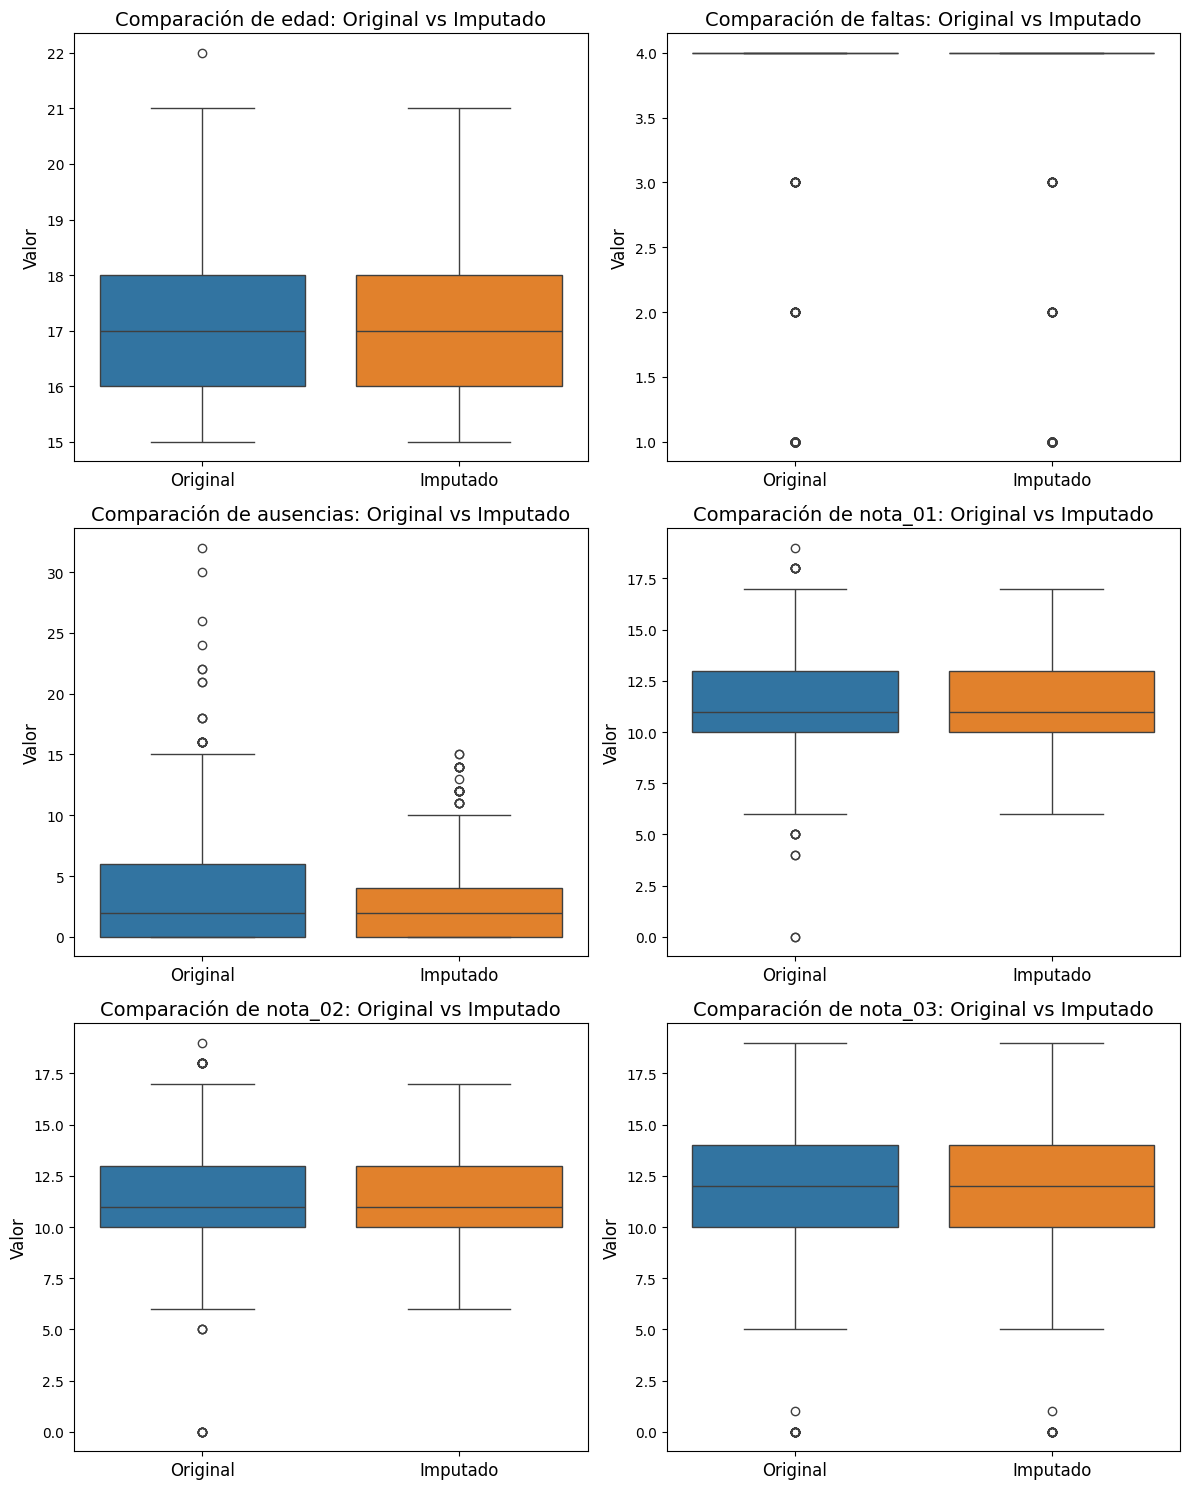

In [ ]:
# Crear un DataFrame que combine los valores originales e imputados
df_comparison = pd.DataFrame()

for col in numeric_cols:
    df_comparison[f'{col}_original'] = df_algebra_vectorial[col]
    df_comparison[f'{col}_imputed'] = dfc[col]

# Definir el número de filas según el número de variables numéricas
num_vars = len(numeric_cols)
rows = num_vars if num_vars <= 4 else (num_vars // 2) + (num_vars % 2)

# Generar los boxplots comparativos con un diseño más espacioso
plt.figure(figsize=(12, 5 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(data=df_comparison[[f'{col}_original', f'{col}_imputed']])
    plt.title(f'Comparación de {col}: Original vs Imputado', fontsize=14)
    plt.xticks([0, 1], ['Original', 'Imputado'], fontsize=12)
    plt.xlabel('')
    plt.ylabel('Valor', fontsize=12)

plt.tight_layout()
plt.show()

### **Hipótesis 2**

En esta hipótesis se plantea que es importante evitar la imputación de los atípicos pues se eliminaría información importante, como rangos de notas y rangos de faltas. Por lo tanto, ningun atípico de las variables mencionadas será imputado, solo ausencias y edad.

In [ ]:
dfc_01 = df_algebra_vectorial.copy()

# Imputar atípicos en cada columna numérica
for col in numeric_cols:
    # Eliminar valores faltantes para el cálculo
    col_data = df_algebra_vectorial[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if col in ['nota_03','nota_01','nota_02','faltas']:
        continue
    else:
        # Para otras variables, imputar con la mediana de los valores dentro de los límites de IQR
        median_non_outliers = dfc_01[(dfc_01[col] >= lower_bound) & (dfc_01[col] <= upper_bound)][col].median()
        dfc_01.loc[(dfc_01[col] < lower_bound) | (dfc_01[col] > upper_bound), col] = median_non_outliers


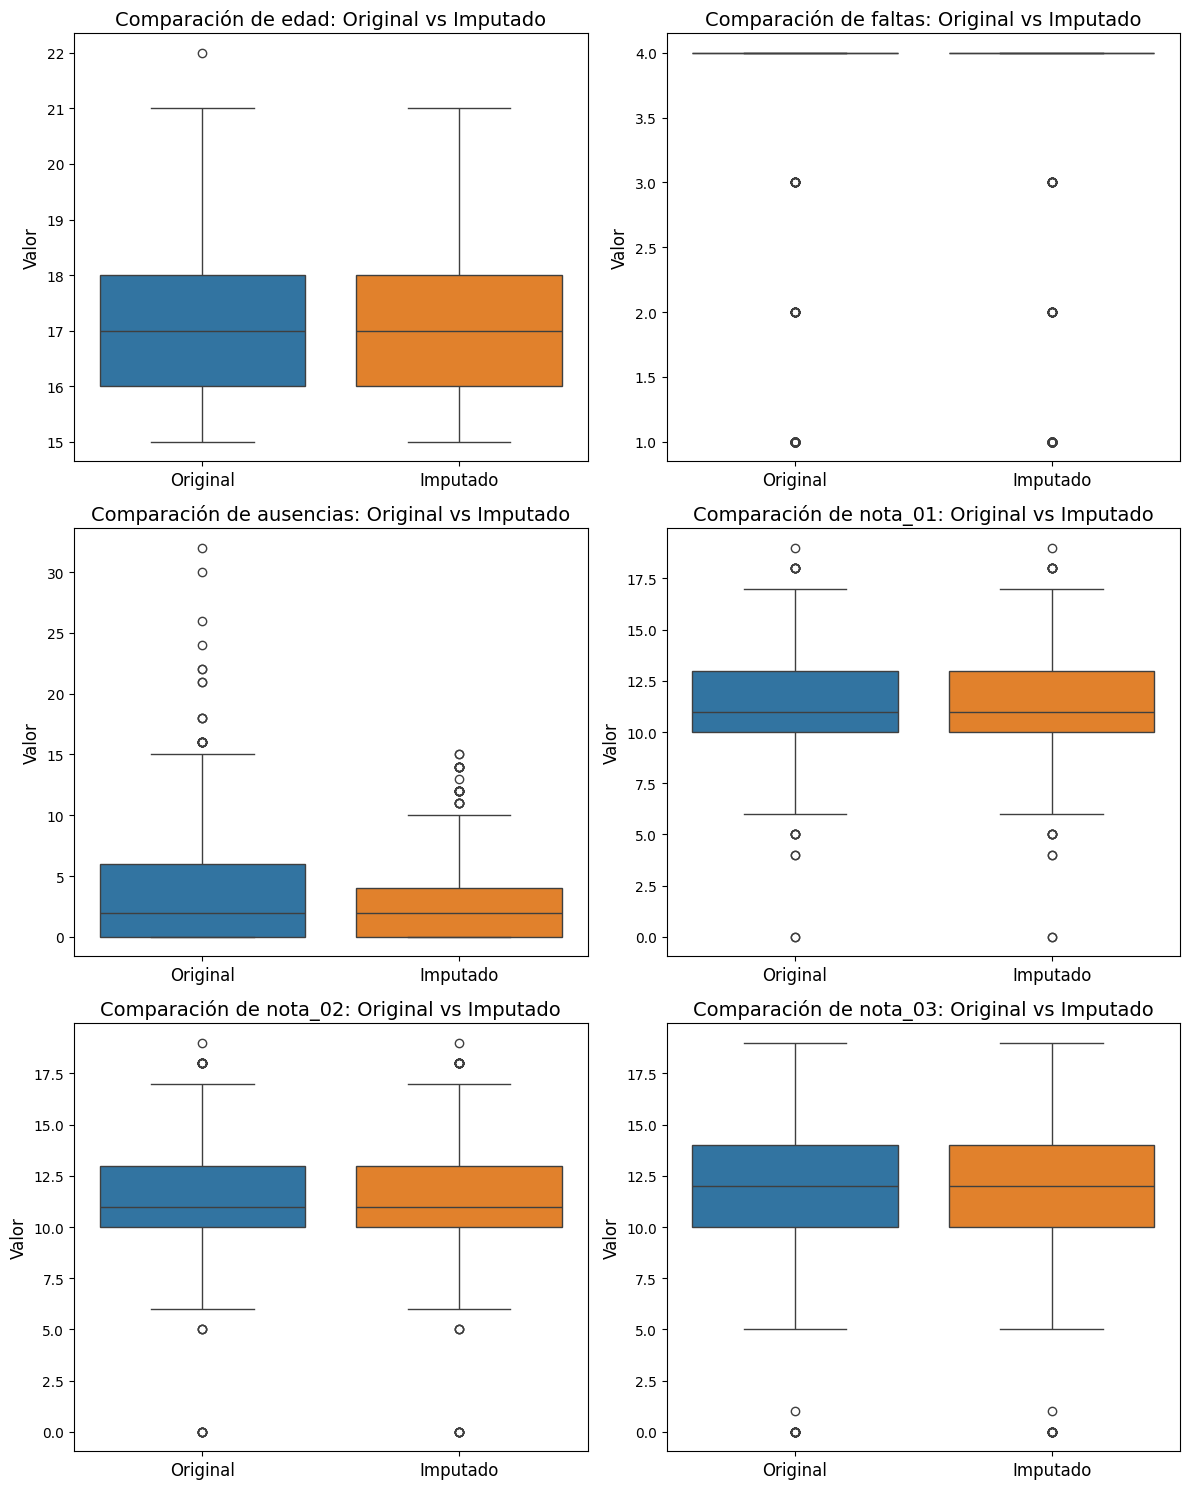

In [ ]:
# Crear un DataFrame que combine los valores originales e imputados
df_comparison = pd.DataFrame()

for col in numeric_cols:
    df_comparison[f'{col}_original'] = df_algebra_vectorial[col]
    df_comparison[f'{col}_imputed'] = dfc_01[col]

# Definir el número de filas según el número de variables numéricas
num_vars = len(numeric_cols)
rows = num_vars if num_vars <= 4 else (num_vars // 2) + (num_vars % 2)

# Generar los boxplots comparativos con un diseño más espacioso
plt.figure(figsize=(12, 5 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(data=df_comparison[[f'{col}_original', f'{col}_imputed']])
    plt.title(f'Comparación de {col}: Original vs Imputado', fontsize=14)
    plt.xticks([0, 1], ['Original', 'Imputado'], fontsize=12)
    plt.xlabel('')
    plt.ylabel('Valor', fontsize=12)

plt.tight_layout()
plt.show()

A partir de este momento se trabajarán dos dataframes, con el fin de evaluar el desempeño del modelo de las dos hipótesis planteadas.

El dataframe *'dfc'* no tiene los valores de las variables *'nota_03'* y *'faltas'* imputados.

El dataframe *'dfc_01'* corresponde a la hipótesis 2, donde no se imputan los atípicos de las variables *'nota_01'*, *'nota_02'*, *'nota_03'* y *'faltas'*.

# Modelo base

# Elección de variables numéricas y categóricas

### Elección de variables para hipótesis 1, con imputaciones en nota_01 y nota_02. Data frame: dfc

#### Variables categóricas

In [ ]:
#Nivel de significancia entre nota_03 en relacion a todas las variables categoricas, por medio de la ANOVA

categorical_cols = dfc.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    model = ols(f'nota_03 ~ C({col})', data=dfc).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA para la variable '{col}':")
    print(anova_table)
    print("\n")
    if anova_table['PR(>F)'][f'C({col})'] > 0.025:
        print('Se rechaza')
    else:
        print('Se acepta')
    print("\n" + "="*80 + "\n")

ANOVA para la variable 'departamento':
                      sum_sq     df          F        PR(>F)
C(departamento)   543.163510    1.0  56.665646  1.733784e-13
Residual         6220.931728  649.0        NaN           NaN


Se acepta


ANOVA para la variable 'sexo':
               sum_sq     df          F    PR(>F)
C(sexo)    111.882524    1.0  10.915429  0.001006
Residual  6652.212714  649.0        NaN       NaN


Se acepta


ANOVA para la variable 'direccion':
                   sum_sq     df          F    PR(>F)
C(direccion)   188.468909    1.0  18.601471  0.000019
Residual      6575.626330  649.0        NaN       NaN


Se acepta


ANOVA para la variable 't_familia':
                   sum_sq     df         F    PR(>F)
C(t_familia)    13.840643    1.0  1.330702  0.249105
Residual      6750.254596  649.0       NaN       NaN


Se rechaza


ANOVA para la variable 'padres_status':
                       sum_sq     df        F    PR(>F)
C(padres_status)     0.001151    1.0  0.00011  0.99

Si se utiliza un nivel de significancia de 0.025 para así ser mucho más estrictos con el modelo, se puede concluir que, de todas las variables analizadas, las que parecen tener un efecto significativo o mayor relación con "nota_03" son:

departamento, sexo, direccion, madre_edu, padre_edu, madre_trab, padre_trab, razon, t_examen, t_estudio, postgrado, internet, relacion_sen, relacion_fam, tiempo_libre, salir_amigos, cons_alcohol_sem, cons_alcohol_finde.
Ademas, dado la experiencia, si un padre tiene educacion el otro tiene mas probabilidad de tambien tenerla, es por esto que estas dos variables van de la mano.

Las demás variables no muestran una influencia significativa en "nota_03", según los resultados del ANOVA.

#### Diagrama de correlacion de las variables numéricas

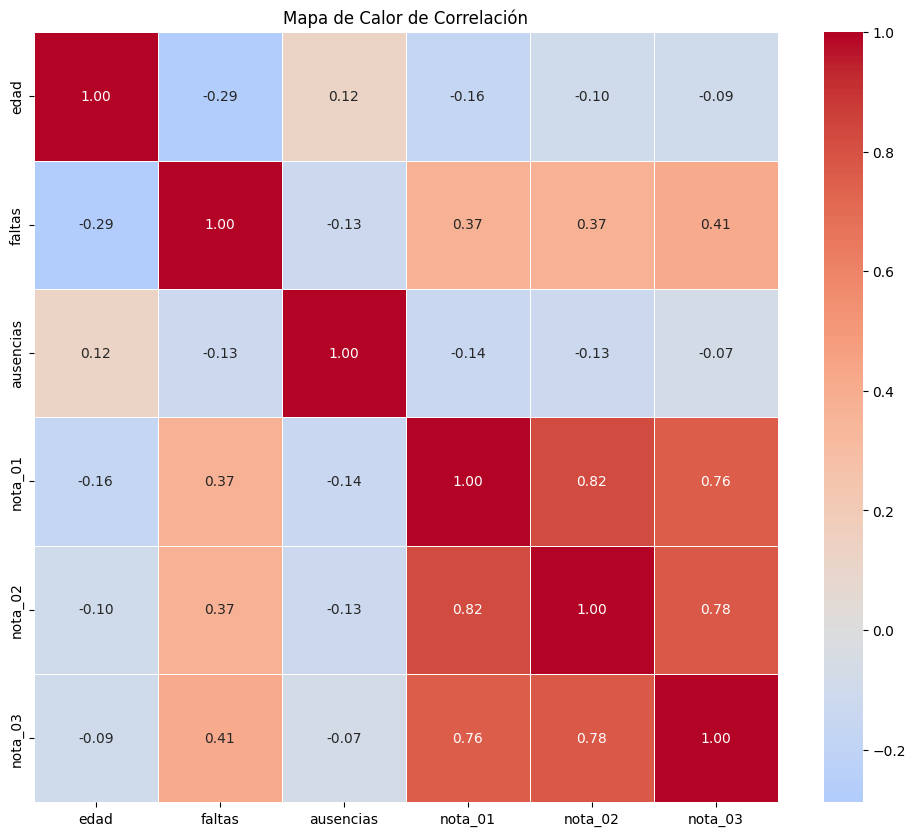

In [ ]:
def graficar_mapa_correlacion(df):
    # Seleccionar las columnas numéricas
    numeric_vars = df.select_dtypes(include=['number']).columns

    # Calcular la matriz de correlación
    corr_matrix = df[numeric_vars].corr(method='pearson')  # Puedes cambiar 'pearson' por 'spearman'

    # Crear el mapa de calor
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
    plt.title('Mapa de Calor de Correlación')
    plt.show()

# Llamar a la función para generar el mapa de calor de correlación
graficar_mapa_correlacion(dfc)

La variable faltas presenta una correlación alta con cada una de las notas, sin embargo, muestra ser directa y, como programadores concluimos que, no tiene mucho sentido que a mayor faltas, mejor nota.

Las variables 'nota_01' y 'nota_02' presentan una relación muy alta entre ellas, lo que podría presentar un problema de multicolineidad.

La relación de la VR con ausencias es inversa, así como edad. Sim embargo, no tienen una correlación significativa con 'nota_03'

'nota_01' y 'nota_02' son las variables que mayor correlación tienen con la variable respuesta, lo que da un indicio de las variables que debemos escoger para el modelo.

### Elección de variables para hipótesis 2, sin imputación de outliers para nota_01 y nota_02. Data frame: dfc_01

#### Variables categóricas

In [ ]:
#Nivel de significancia entre nota_03 en relacion a todas las variables categoricas, por medio de la ANOVA

categorical_cols_01 = dfc_01.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_01:
    model = ols(f'nota_03 ~ C({col})', data=dfc_01).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA para la variable '{col}':")
    print(anova_table)
    print("\n")
    if anova_table['PR(>F)'][f'C({col})'] > 0.025:
        print('Se rechaza')
    else:
        print('Se acepta')
    print("\n" + "="*80 + "\n")

ANOVA para la variable 'departamento':
                      sum_sq     df          F        PR(>F)
C(departamento)   543.163510    1.0  56.665646  1.733784e-13
Residual         6220.931728  649.0        NaN           NaN


Se acepta


ANOVA para la variable 'sexo':
               sum_sq     df          F    PR(>F)
C(sexo)    111.882524    1.0  10.915429  0.001006
Residual  6652.212714  649.0        NaN       NaN


Se acepta


ANOVA para la variable 'direccion':
                   sum_sq     df          F    PR(>F)
C(direccion)   188.468909    1.0  18.601471  0.000019
Residual      6575.626330  649.0        NaN       NaN


Se acepta


ANOVA para la variable 't_familia':
                   sum_sq     df         F    PR(>F)
C(t_familia)    13.840643    1.0  1.330702  0.249105
Residual      6750.254596  649.0       NaN       NaN


Se rechaza


ANOVA para la variable 'padres_status':
                       sum_sq     df        F    PR(>F)
C(padres_status)     0.001151    1.0  0.00011  0.99

Si se utiliza un nivel de significancia de 0.025 para la hipótesis 2, se puede concluir que, las variables con mayor relación con "nota_03" son:

departamento, sexo, direccion, madre_edu, padre_edu, madre_trab, padre_trab, razon, t_examen, t_estudio, postgrado, internet, relacion_sen, relacion_fam, tiempo_libre, salir_amigos, cons_alcohol_sem, cons_alcohol_finde.

Son las mismas variables seleccionadas para la hipótesis 1.

Las demás variables no muestran una influencia significativa en "nota_03", según los resultados del ANOVA.

#### Variable numéricas

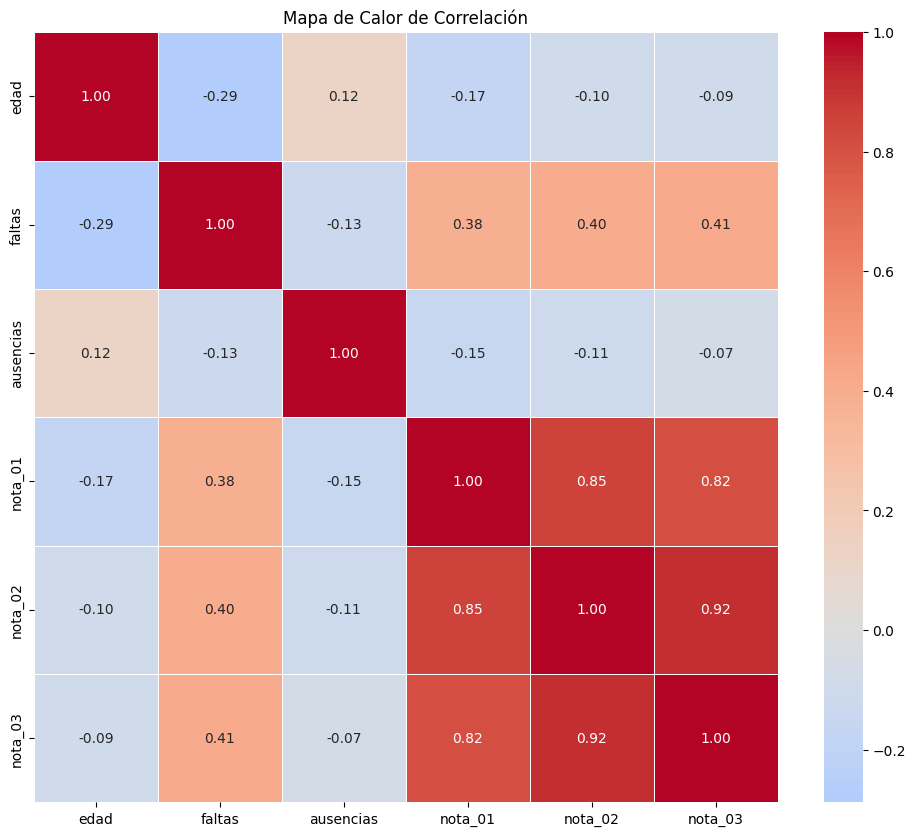

In [ ]:
def graficar_mapa_correlacion(df):
    # Seleccionar las columnas numéricas
    numeric_vars = df.select_dtypes(include=['number']).columns

    # Calcular la matriz de correlación
    corr_matrix = df[numeric_vars].corr(method='pearson')  # Puedes cambiar 'pearson' por 'spearman'

    # Crear el mapa de calor
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
    plt.title('Mapa de Calor de Correlación')
    plt.show()

# Llamar a la función para generar el mapa de calor de correlación
graficar_mapa_correlacion(dfc_01)

Se encuentran correlaciones muy parecidas a las de la hipótesis 1, aumentando la relación entre las notas.

## Pruebas de normalidad de variable respuesta y variables mas correlacionadas


#### Para dfc

In [ ]:
#prueba de normalidad Kolmogorov-Smirnov
def ks_test_normal(df,variables):
    for var in variables:
        statistic, p_value = kstest(df[var], 'norm', args=(df[var].mean(), df[var].std()))
        print(f"Variable: {var}")
        print(f"KS Statistic: {statistic:.4f}, p-value: {p_value:.4f}")
        if p_value > 0.05:
            print(f"p-value > 0.05: No se rechaza la hipótesis nula, {var} podría seguir una distribución normal.\n")
        else:
            print(f"p-value <= 0.05: Se rechaza la hipótesis nula, {var} no sigue una distribución normal.\n")

# Aplicar la función al DataFrame
variables = ['nota_01', 'nota_02', 'nota_03']
ks_results = ks_test_normal(dfc,variables)

Variable: nota_01
KS Statistic: 0.1036, p-value: 0.0000
p-value <= 0.05: Se rechaza la hipótesis nula, nota_01 no sigue una distribución normal.

Variable: nota_02
KS Statistic: 0.1234, p-value: 0.0000
p-value <= 0.05: Se rechaza la hipótesis nula, nota_02 no sigue una distribución normal.

Variable: nota_03
KS Statistic: 0.1238, p-value: 0.0000
p-value <= 0.05: Se rechaza la hipótesis nula, nota_03 no sigue una distribución normal.



In [ ]:
def prueba_normalidad(df, variables):

    for var in variables:
        stat, p_value = stats.shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
variables = ['nota_01', 'nota_02', 'nota_03']
prueba_normalidad(dfc, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.977607627058462, Valor-p: 2.000077916375767e-08
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.9750758204033254, Valor-p: 4.4263743212854644e-09
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.925819288548229, Valor-p: 2.1590746214358812e-17
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




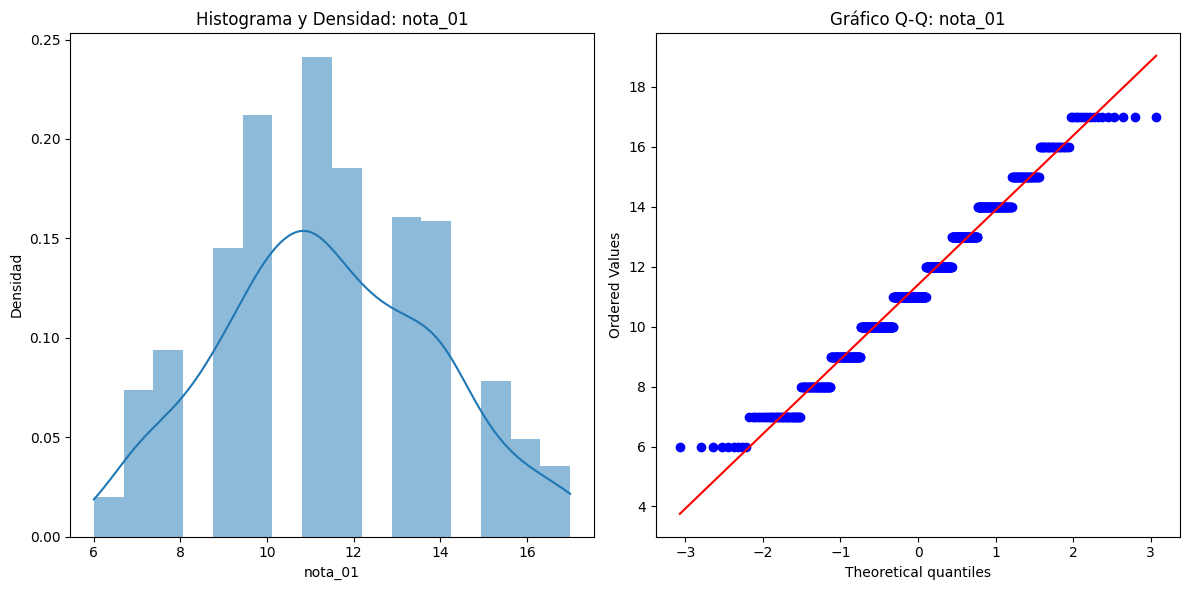

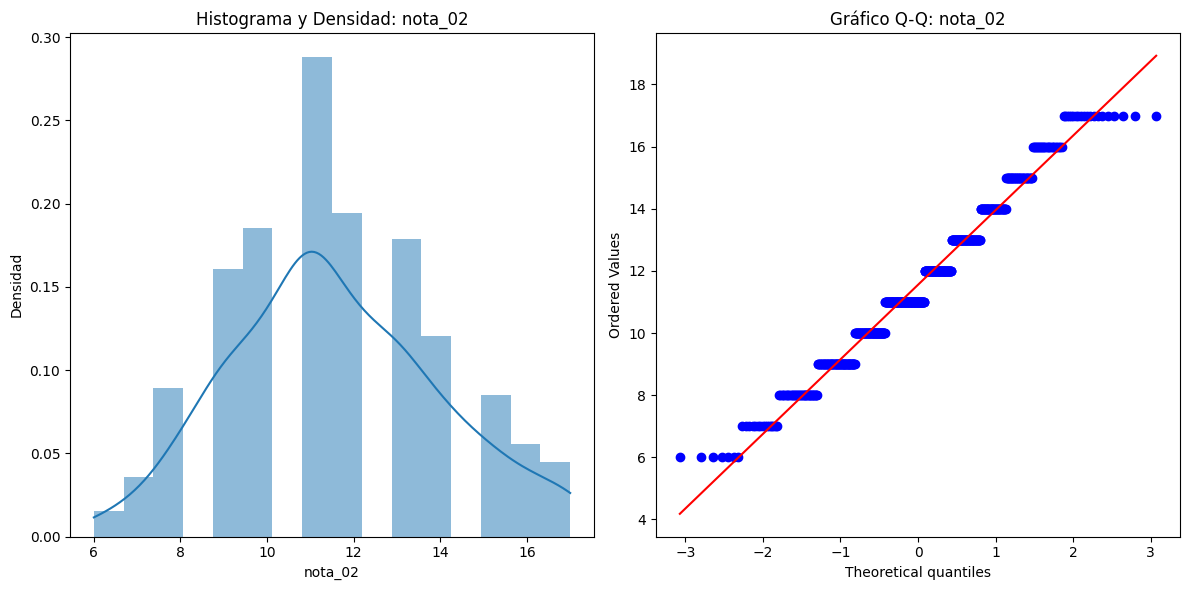

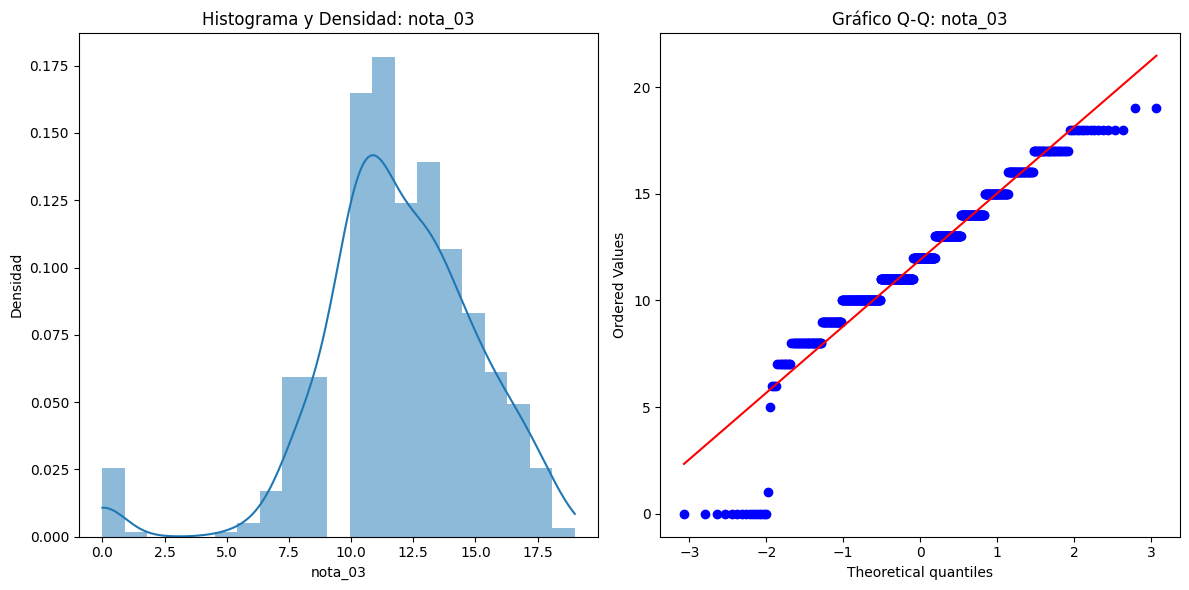

In [ ]:
def evaluar_normalidad(df, variables):
    """
    Evalúa la normalidad de las variables numéricas en el DataFrame usando histogramas con líneas de densidad y gráficos Q-Q.

    Args:
    df (pd.DataFrame): DataFrame que contiene las variables numéricas.
    variables (list): Lista de nombres de las variables a evaluar.
    """
    for var in variables:
        plt.figure(figsize=(12, 6))

        # Histograma con línea de densidad
        plt.subplot(1, 2, 1)
        sns.histplot(df[var], kde=True, stat='density', linewidth=0)
        plt.title(f'Histograma y Densidad: {var}')
        plt.xlabel(var)
        plt.ylabel('Densidad')

        # Gráfico Q-Q
        plt.subplot(1, 2, 2)
        stats.probplot(df[var].dropna(), dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q: {var}')

        plt.tight_layout()
        plt.show()


evaluar_normalidad(dfc, variables)

In [ ]:
dfc_transformado = dfc.copy()

from sklearn.preprocessing import StandardScaler
dfc_transformado['nota_01'] = np.log1p(dfc_transformado['nota_01'])  # Transformación logarítmica
dfc_transformado['nota_02'] = np.log1p(dfc_transformado['nota_02'])  # Transformación logarítmica
dfc_transformado['nota_03'] = np.log1p(dfc_transformado['nota_03'])  # Transformación logarítmica
dfc_transformado[['nota_01', 'nota_02', 'nota_03']] = StandardScaler().fit_transform(dfc_transformado[['nota_01', 'nota_02', 'nota_03']])  # Estandarización

In [ ]:
#variables = ['nota_01', 'nota_02', 'nota_03']
def prueba_normalidad(df, variables):

    for var in variables:
        stat, p_value = stats.shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
prueba_normalidad(dfc_transformado, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.9708475657893445, Valor-p: 4.3263953075046317e-10
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.974913639205763, Valor-p: 4.031504795893135e-09
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.5610036075475466, Valor-p: 2.0642745976187553e-37
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




A pesar de aplicar una transformación logarítmica a las variables más significativas, estas no cumplen con el supuesto de normalidad. Por lo tanto, retomaremos el análisis utilizando la base de datos original, "dfc", en la cual no se ha aplicado esta transformación logarítmica

#### Para dfc_01

In [ ]:
#prueba de normalidad Kolmogorov-Smirnov
# Aplicar la función al DataFrame
variables = ['nota_01', 'nota_02', 'nota_03']
ks_results = ks_test_normal(dfc_01,variables)

Variable: nota_01
KS Statistic: 0.0832, p-value: 0.0002
p-value <= 0.05: Se rechaza la hipótesis nula, nota_01 no sigue una distribución normal.

Variable: nota_02
KS Statistic: 0.0876, p-value: 0.0001
p-value <= 0.05: Se rechaza la hipótesis nula, nota_02 no sigue una distribución normal.

Variable: nota_03
KS Statistic: 0.1238, p-value: 0.0000
p-value <= 0.05: Se rechaza la hipótesis nula, nota_03 no sigue una distribución normal.



In [ ]:
# Realizar la prueba de normalidad
variables = ['nota_01', 'nota_02', 'nota_03']
prueba_normalidad(dfc_01, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.9836021142714357, Valor-p: 1.105612702974115e-06
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.9615340034885028, Valor-p: 4.992505317936048e-12
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.925819288548229, Valor-p: 2.1590746214358812e-17
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




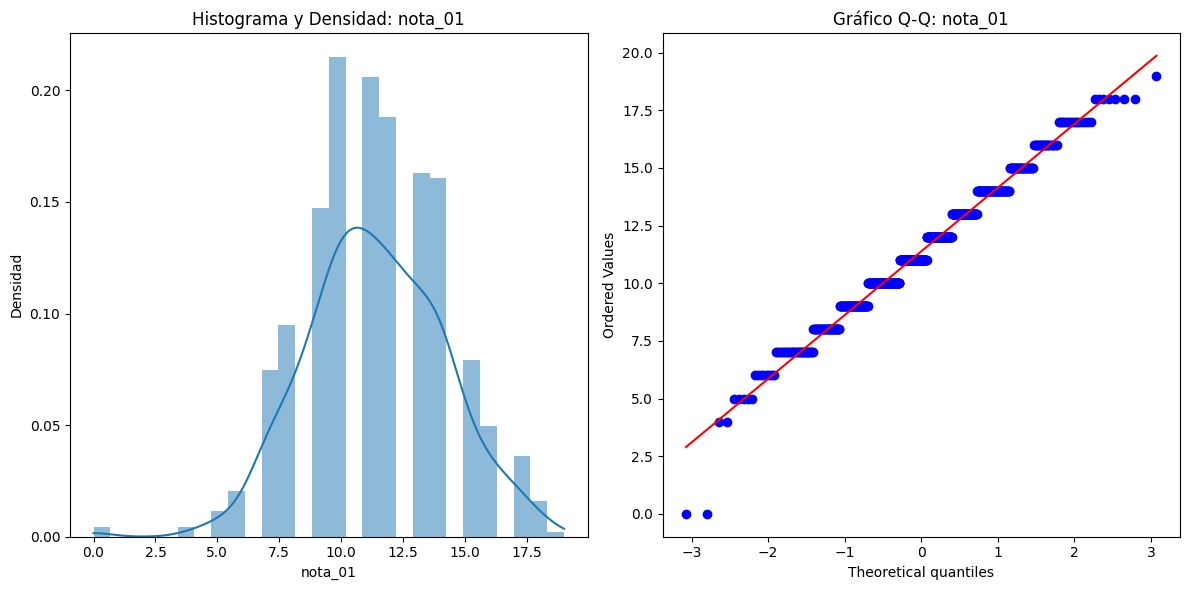

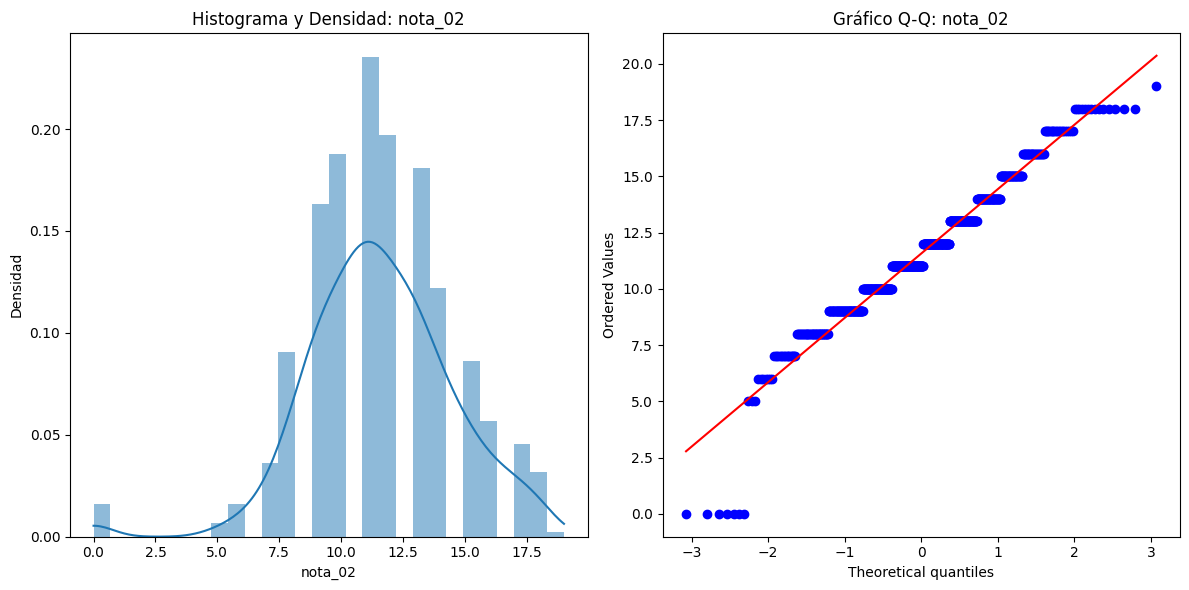

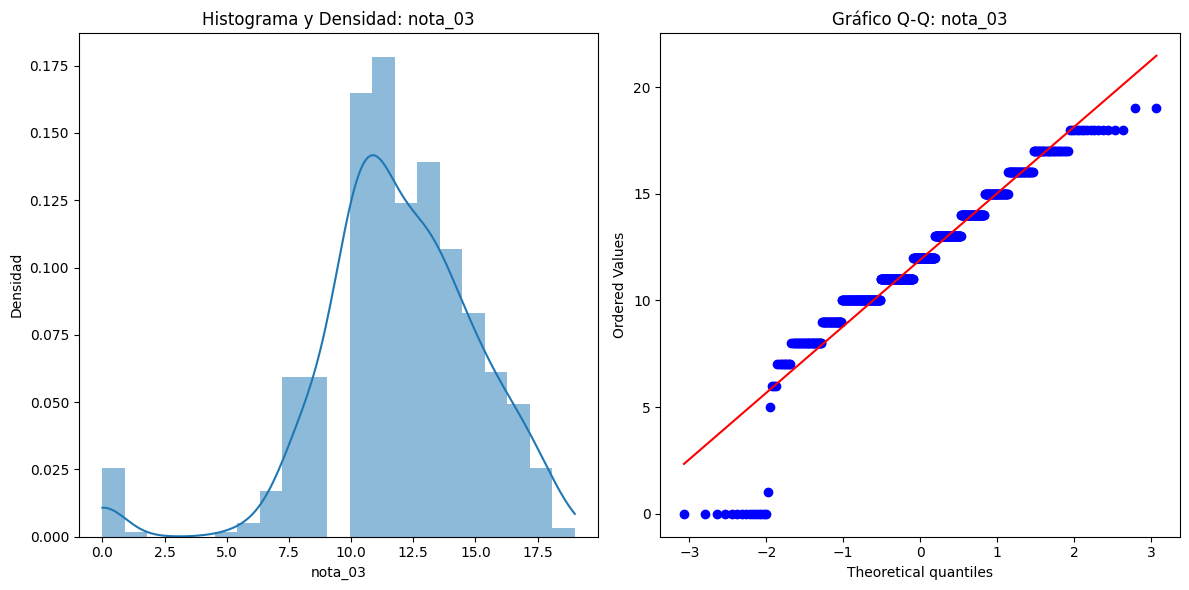

In [ ]:
#Evalúa la normalidad de las variables numéricas en el DataFrame usando histogramas con líneas de densidad y gráficos Q-Q.

evaluar_normalidad(dfc_01, variables)

In [ ]:
dfc_01_transformado = dfc_01.copy()

from sklearn.preprocessing import StandardScaler
dfc_01_transformado['nota_01'] = np.log1p(dfc_01_transformado['nota_01'])  # Transformación logarítmica
dfc_01_transformado['nota_02'] = np.log1p(dfc_01_transformado['nota_02'])  # Transformación logarítmica
dfc_01_transformado['nota_03'] = np.log1p(dfc_01_transformado['nota_03'])  # Transformación logarítmica
dfc_01_transformado[['nota_01', 'nota_02', 'nota_03']] = StandardScaler().fit_transform(dfc_01_transformado[['nota_01', 'nota_02', 'nota_03']])  # Estandarización

In [ ]:
# Realizar la prueba de normalidad después de transformación
prueba_normalidad(dfc_01_transformado, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.8410083994110361, Valor-p: 5.447505519431351e-25
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.6617440274681725, Valor-p: 5.675734509274447e-34
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.5610036075475466, Valor-p: 2.0642745976187553e-37
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




# Preparación de los datos

Después de analizar el comportamiento y la correlación de las variables, se seleccionaron aquellas que tienen mayor impacto en nuestra variable respuesta. Estas son:

**NUMERICAS**: Se escogieron estas variables puesto que eran las que evidenciaban mayor correlacion entre ellas y respecto a la variable respuesta
*   nota_1
*   nota_2
*   nota_3

La variable **faltas** presenta un comportamiento opuesto a la hipotesis esperada, la cual sería que a mayor faltas, menor sea la nota del estudiante.  Por el contrario estas variables tienen una correlación positiva, lo que quiere decir que a mayor faltas mayor es la nota del estudiante. Bajo este criterio decidimos no tomar la variable faltas para nuestro modelo

**CATEGORICAS**: La seleccion de estas, fue basada en los resultados de las ANOVAS, que permiten observar el nivel de significancia de las variables categoricas en relacion a la variable numérica "nota_03", ademas tambien se tuvo en cuenta para la selección de estas variables la experiencia y previo conocimiento del tema
*   departamento
*   sexo
*   direccion
*   madre_edu
*   padre_edu
*   madre_trab
*   padre_trab
*   razon
*   t_examen
*   t_estudio
*   postgrado
*   internet
*   relacion_sen
*   relacion_fam
*   salir_amigos
*   tiempo_libre
*   cons_alcohol_sem
*   cons_alcohol_finde

### Para dfc

Teniendo en cuenta la matriz de correlación presentada anteriormente, es notable que la correlación entre nota_01 y nota_02 es alta de 82%, lo que podría presentar un problema de multicolinealidad. Por lo tanto, para la hipótesis 1, solo se tendrá en cuenta la nota que tiene mayor relación con la variable respuesta, que en este caso es nota_02.

In [ ]:
#Creacion de vectores con variables numericas y categoricas
numericas = ['nota_02', 'nota_03']
df_numericas = dfc[numericas]

categoricas = ['departamento', 'sexo', 'direccion', 'madre_edu','padre_edu', 'madre_trab', 'padre_trab', 'razon', 't_examen', 't_estudio', 'postgrado', 'internet', 'relacion_sen', 'salir_amigos', 'tiempo_libre', 'cons_alcohol_sem','cons_alcohol_finde']
df_categoricas = dfc[categoricas]

#Union de vectores para formar el dataframe con el que se hara el modelo
df_final_algebra = pd.concat([df_numericas, df_categoricas], axis=1)
df_final_algebra

,nota_02,nota_03,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,t_examen,t_estudio,postgrado,internet,relacion_sen,salir_amigos,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde
0,11,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo
1,11,11,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,menos 15 min,2 a 5 horas,si,si,no,Medio,Medio,Muy bajo,Muy bajo
2,13,12,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,menos 15 min,2 a 5 horas,si,si,no,Bajo,Medio,Bajo,Medio
3,14,14,II,M,U,Educación superior,6° a 9°,salud,servicios,recomendacion,menos 15 min,5 a 10 horas,si,si,si,Bajo,Bajo,Muy bajo,Muy bajo
4,13,13,II,M,U,10° a 11°,10° a 11°,otro,otro,recomendacion,menos 15 min,2 a 5 horas,si,no,no,Bajo,Medio,Muy bajo,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,12,9,IS,M,U,Primaria hasta 5°,Primaria hasta 5°,otro,otro,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Muy bajo,Muy bajo,Muy bajo,Muy bajo
647,10,10,IS,H,U,10° a 11°,Primaria hasta 5°,servicios,servicios,habilidad,15 a 30 min,menos 2 horas,si,si,no,Muy alto,Alto,Medio,Alto
648,11,11,IS,H,R,10° a 11°,6° a 9°,servicios,otro,habilidad,30 min a 1 hora,menos 2 horas,si,si,no,Muy bajo,Alto,Medio,Alto
649,11,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo


### Para dfc_01

Para la hipótesis 2, se decide no tener en cuenta la correlación de nota_01 y nota_02. Lo anterior con el fin de realizar un modelo donde se evalue el desempeño del mismo teniendo en cuenta ambas notas, pues como científicos consideramos que entre más datos históricos de información de las notas, mejor la predicción.

In [ ]:
#Creacion de vectores con variables numericas y categoricas
numericas_01 = ['nota_01', 'nota_02', 'nota_03']
df_01_numericas = dfc_01[numericas_01]

categoricas_01 = ['departamento', 'sexo', 'direccion', 'madre_edu','padre_edu', 'madre_trab', 'padre_trab', 'razon', 't_examen', 't_estudio', 'postgrado', 'internet', 'relacion_sen', 'salir_amigos', 'tiempo_libre', 'cons_alcohol_sem','cons_alcohol_finde']
df_01_categoricas = dfc_01[categoricas_01]

#Union de vectores para formar el dataframe con el que se hara el modelo
df_final_algebra_01 = pd.concat([df_01_numericas, df_01_categoricas], axis=1)
df_final_algebra_01

,nota_01,nota_02,nota_03,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,t_examen,t_estudio,postgrado,internet,relacion_sen,salir_amigos,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde
0,0,11,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo
1,9,11,11,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,menos 15 min,2 a 5 horas,si,si,no,Medio,Medio,Muy bajo,Muy bajo
2,12,13,12,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,menos 15 min,2 a 5 horas,si,si,no,Bajo,Medio,Bajo,Medio
3,14,14,14,II,M,U,Educación superior,6° a 9°,salud,servicios,recomendacion,menos 15 min,5 a 10 horas,si,si,si,Bajo,Bajo,Muy bajo,Muy bajo
4,11,13,13,II,M,U,10° a 11°,10° a 11°,otro,otro,recomendacion,menos 15 min,2 a 5 horas,si,no,no,Bajo,Medio,Muy bajo,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,11,12,9,IS,M,U,Primaria hasta 5°,Primaria hasta 5°,otro,otro,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Muy bajo,Muy bajo,Muy bajo,Muy bajo
647,10,10,10,IS,H,U,10° a 11°,Primaria hasta 5°,servicios,servicios,habilidad,15 a 30 min,menos 2 horas,si,si,no,Muy alto,Alto,Medio,Alto
648,10,11,11,IS,H,R,10° a 11°,6° a 9°,servicios,otro,habilidad,30 min a 1 hora,menos 2 horas,si,si,no,Muy bajo,Alto,Medio,Alto
649,0,11,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo


# Creación modelo de regresión lineal

### Para dfc

*     Separar variable respuesta de variables para predecir

In [ ]:
y_target=df_final_algebra['nota_03'] #Variable respuesta del modelo
x_features=df_final_algebra.drop(['nota_03'],axis=1) #variables de interés para el modelo

In [ ]:
x_features.head()

,nota_02,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,t_examen,t_estudio,postgrado,internet,relacion_sen,salir_amigos,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde
0,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo
1,11,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,menos 15 min,2 a 5 horas,si,si,no,Medio,Medio,Muy bajo,Muy bajo
2,13,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,menos 15 min,2 a 5 horas,si,si,no,Bajo,Medio,Bajo,Medio
3,14,II,M,U,Educación superior,6° a 9°,salud,servicios,recomendacion,menos 15 min,5 a 10 horas,si,si,si,Bajo,Bajo,Muy bajo,Muy bajo
4,13,II,M,U,10° a 11°,10° a 11°,otro,otro,recomendacion,menos 15 min,2 a 5 horas,si,no,no,Bajo,Medio,Muy bajo,Bajo


*   Dumizacion de variables categoricas y escalamiento de variables numericas

In [ ]:
def preprocess_features(df):
    # Procesar variables categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        valores = df[col].unique()
        if len(valores) == 2:
            df[col] = df[col].map({valores[0]: 0, valores[1]: 1})
        else:
            # Si hay más de dos categorías, crear dummies
            dummies = pd.get_dummies(df[col], prefix=col, drop_first= False)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    # Procesar columnas booleanas
    boolean_cols = df.select_dtypes(include='bool').columns
    df[boolean_cols] = df[boolean_cols].astype(int)

    # Identificar columnas numéricas
    numcol = [col for col in df.columns if df[col].dtype == "int64"]

    # Aplicar Min-Max Scaling
    scaler = MinMaxScaler()
    df[numcol] = scaler.fit_transform(df[numcol])

    return df

x_features_dum=x_features.copy()
x_features_dum=preprocess_features(x_features_dum)
x_features_dum.head()

,nota_02,departamento,sexo,direccion,postgrado,internet,relacion_sen,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,t_examen_15 a 30 min,t_examen_30 min a 1 hora,t_examen_mas 1 hora,t_examen_menos 15 min,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_mas 10 horas,t_estudio_menos 2 horas,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,cons_alcohol_sem_Alto,cons_alcohol_sem_Bajo,cons_alcohol_sem_Medio,cons_alcohol_sem_Muy alto,cons_alcohol_sem_Muy bajo,cons_alcohol_finde_Alto,cons_alcohol_finde_Bajo,cons_alcohol_finde_Medio,cons_alcohol_finde_Muy alto,cons_alcohol_finde_Muy bajo
0,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.454545,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.636364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.727273,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


*    Separacion de base de datos: entrenamiento y prueba

In [ ]:
df_modelo=x_features_dum.copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_modelo, y_target, test_size=0.3, random_state=321)

*    Modelo de regresión lineal

In [ ]:
model_reg=LinearRegression()
model_reg.fit(x_train,y_train) #entrenar modelo

LinearRegression()

*   Resultados del modelo

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print("Coeficientes: ", model_reg.coef_)
print("\nIntercepto: ", model_reg.intercept_)

Coeficientes:  [ 1.06488382e+01 -6.02896167e-01 -2.63150166e-01 -4.73043320e-01
 -4.13957935e-01  3.31519690e-01 -2.30392840e-01  1.93749470e+13
  1.93749470e+13  1.93749470e+13  1.93749470e+13  1.93749470e+13
 -1.77492088e+13 -1.77492088e+13 -1.77492088e+13 -1.77492088e+13
 -1.77492088e+13 -3.98847367e+12 -3.98847367e+12 -3.98847367e+12
 -3.98847367e+12 -3.98847367e+12  6.91722951e+12  6.91722951e+12
  6.91722951e+12  6.91722951e+12  6.91722951e+12  4.33304395e+12
  4.33304395e+12  4.33304395e+12  4.33304395e+12 -3.33440575e+13
 -3.33440575e+13 -3.33440575e+13 -3.33440575e+13  2.89806367e+13
  2.89806367e+13  2.89806367e+13  2.89806367e+13  6.67976906e+11
  6.67976906e+11  6.67976906e+11  6.67976906e+11  6.67976906e+11
  1.81474229e+13  1.81474229e+13  1.81474229e+13  1.81474229e+13
  1.81474229e+13  5.93767509e+12  5.93767509e+12  5.93767509e+12
  5.93767509e+12  5.93767509e+12  1.32069723e+13  1.32069723e+13
  1.32069723e+13  1.32069723e+13  1.32069723e+13]

Intercepto:  -4248416444

*   Realizar la predicción

In [ ]:
model_pred_test=model_reg.predict(x_test)
model_pred_test

array([16.9609375,  8.3984375, 11.2890625, 10.5546875, 11.796875 ,
       12.984375 , 17.0390625, 12.1640625,  6.5859375, 11.1953125,
       14.2890625, 13.0390625, 13.6328125, 12.6796875, 13.125    ,
       12.1484375, 14.9140625, 11.3671875,  8.5234375, 12.765625 ,
        6.4453125, 10.765625 , 13.1875   , 13.0390625, 10.265625 ,
        9.0703125, 13.53125  , 15.0078125, 11.9453125, 13.0078125,
       12.8359375, 10.8046875, 15.09375  , 14.8515625,  9.8828125,
       15.4609375, 16.1953125,  9.7109375, 12.984375 , 13.3828125,
       12.9609375,  8.6328125, 16.1484375,  6.6484375, 11.3125   ,
       13.265625 , 14.7265625, 16.4921875,  9.34375  , 14.4609375,
       13.5078125, 13.53125  , 11.9765625, 15.3359375, 13.703125 ,
        8.6015625, 12.6796875, 11.2890625, 16.4921875, 10.6328125,
       13.28125  , 11.4296875, 11.796875 , 10.9921875, 12.8984375,
       15.78125  , 11.359375 ,  8.3125   , 13.15625  , 14.4140625,
       12.3671875, 14.0234375, 10.5859375, 13.4140625, 11.8671

*   Metricas para el testeo

In [ ]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, model_pred_test))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, model_pred_test)))
print("MAE: %.2f" % mean_absolute_error(y_test, model_pred_test))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, model_pred_test))
print("R2: %.2f" % r2_score(y_test, model_pred_test))

# R2 ajustado
r2 = r2_score(y_test, model_pred_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 4.79
RMSE 2.19
MAE: 1.30
MAPE: 1167546714621241.50
R2: 0.56
R2-adjusted: 0.37


*    Metricas para entrenamiento

In [ ]:
model_pred_train=model_reg.predict(x_train)
#model_pred_train

In [ ]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_train, model_pred_train))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_train, model_pred_train)))
print("MAE: %.2f" % mean_absolute_error(y_train, model_pred_train))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_train, model_pred_train))
print("R2: %.2f" % r2_score(y_train, model_pred_train))

# R2 ajustado
r2 = r2_score(y_train, model_pred_train)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-x_test.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 3.22
RMSE 1.80
MAE: 1.11
MAPE: 729901732190077.50
R2: 0.68
R2-adjusted: 0.64


In [ ]:
#fit linear regression model
model = sm.OLS(y_train,x_train.astype(float)).fit()
pd.options.display.float_format = '{:.2f}'.format

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                nota_03   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     18.24
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.28e-74
Time:                        17:27:29   Log-Likelihood:                -911.82
No. Observations:                 455   AIC:                             1922.
Df Residuals:                     406   BIC:                             2124.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
nota_02         

**Resultado métricas**

Para el modelo de la hipótesis 1 se concluye que para diferentes tipos de semilla el MSE es muy alto. Esta métrica nos indica la media de los errores al cuadrado entre los valores predichos y reales, pero mucho más penalizados por la elevación. En este caso la diferencia de los valores al cuadrado es muy alta, es decir, la diferencia de las notas predichas y reales al cuadrado es de 4.79. Las notas están muy alejadas entre sí.

El RMSE también evalua la diferencia entre las notas predichas y las reales, pero en las unidades de la variable respuesta, lo que significa que tiene menos penalización del error, sin embargo sigue siendo un valor más alto pues se busca que sea más acercado a 0.

Para el MAE se encuentra un valor relativamente aceptable, lo que significa que el promedio de las diferencias entre los valores predichos y reales es de 1.30 unidades. Las notas se alejan en promedio 1.30 unidades entre sí.

En cuanto al MAPE, se obtiene un valor extremadamente alto. Esto es porqué muchas de las notas poseen valores de 0 que afecta el resultado del MAPE, por lo tanto esta métrica no se tendrá en cuenta.

El R2 determina la capacidad del modelo para predecir la variabilidad. En este caso es 56%, que es un valor aceptable pero podría mejorar pues el modelo no está explicando el resto de la variabilidad de los datos.

Por último, el R2-ajustado nos indica que hay una gran penalización por variables o predictores que no le aportan al modelo, es decir, hay algunas variables que no son significativas.

**Comparación métricas del modelo con los datos de testeo y de entrenamiento.**

Se puede concluir que el modelo de la hipótesis 1 presenta un alto overfitting, pues el desempeño del mismo es alto-medio con los datos de entrenamiento, pero muy regular con los datos de testeo. No hay una caída normal de las métricas, pues para el R2 hay un cambio de más del 10% y para el R2 ajustado de un poco menos de la mitad.

Algunas de las semillas testeados fueron 321 y 456.

Este modelo no sería adecuado para la predicción de las notas_03, por lo que la hipótesis 1 es rechazada.

### Para dfc_01

In [ ]:
y_target_01=df_final_algebra_01['nota_03'] #Variable respuesta del modelo
x_features_01=df_final_algebra_01.drop(['nota_03'],axis=1) #variables de interés para el modelo

In [ ]:
x_features_01.head()

,nota_01,nota_02,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,t_examen,t_estudio,postgrado,internet,relacion_sen,salir_amigos,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde
0,0,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo
1,9,11,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,menos 15 min,2 a 5 horas,si,si,no,Medio,Medio,Muy bajo,Muy bajo
2,12,13,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,menos 15 min,2 a 5 horas,si,si,no,Bajo,Medio,Bajo,Medio
3,14,14,II,M,U,Educación superior,6° a 9°,salud,servicios,recomendacion,menos 15 min,5 a 10 horas,si,si,si,Bajo,Bajo,Muy bajo,Muy bajo
4,11,13,II,M,U,10° a 11°,10° a 11°,otro,otro,recomendacion,menos 15 min,2 a 5 horas,si,no,no,Bajo,Medio,Muy bajo,Bajo


*   Dumizacion de variables categoricas y escalamiento de variables numericas

In [ ]:
def preprocess_features(df):
    # Procesar variables categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        valores = df[col].unique()
        if len(valores) == 2:
            df[col] = df[col].map({valores[0]: 0, valores[1]: 1})
        else:
            # Si hay más de dos categorías, crear dummies
            dummies = pd.get_dummies(df[col], prefix=col, drop_first= False)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    # Procesar columnas booleanas
    boolean_cols = df.select_dtypes(include='bool').columns
    df[boolean_cols] = df[boolean_cols].astype(int)

    # Identificar columnas numéricas
    numcol = [col for col in df.columns if df[col].dtype == "int64"]

    # Aplicar Min-Max Scaling
    scaler = MinMaxScaler()
    df[numcol] = scaler.fit_transform(df[numcol])

    return df

x_features_dum_01=x_features_01.copy()
x_features_dum_01=preprocess_features(x_features_dum_01)
x_features_dum_01.head()

,nota_01,nota_02,departamento,sexo,direccion,postgrado,internet,relacion_sen,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,t_examen_15 a 30 min,t_examen_30 min a 1 hora,t_examen_mas 1 hora,t_examen_menos 15 min,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_mas 10 horas,t_estudio_menos 2 horas,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,cons_alcohol_sem_Alto,cons_alcohol_sem_Bajo,cons_alcohol_sem_Medio,cons_alcohol_sem_Muy alto,cons_alcohol_sem_Muy bajo,cons_alcohol_finde_Alto,cons_alcohol_finde_Bajo,cons_alcohol_finde_Medio,cons_alcohol_finde_Muy alto,cons_alcohol_finde_Muy bajo
0,0.00,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1,0.47,0.58,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,0.63,0.68,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,0.74,0.74,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
4,0.58,0.68,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00


*    Separacion de base de datos: entrenamiento y prueba

In [ ]:
df_modelo_01=x_features_dum_01.copy()

In [ ]:
x_train_01, x_test_01, y_train_01, y_test_01 = train_test_split(df_modelo_01, y_target_01, test_size=0.3, random_state=321)

*    Modelo de regresión lineal

In [ ]:
model_reg_01=LinearRegression()
model_reg_01.fit(x_train_01,y_train_01) #entrenar modelo

LinearRegression()

*   Resultados del modelo

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print("Coeficientes: ", model_reg_01.coef_)
print("\nIntercepto: ", model_reg_01.intercept_)

Coeficientes:  [ 3.24472821e+00  1.63037547e+01 -1.66222708e-01 -2.42063951e-01
 -2.67094781e-01  4.32925364e-02  1.74826917e-01  4.66198375e-02
 -3.16013096e+12 -3.16013096e+12 -3.16013096e+12 -3.16013096e+12
 -3.16013096e+12  4.54867435e+13  4.54867435e+13  4.54867435e+13
  4.54867435e+13  4.54867435e+13 -1.65323691e+13 -1.65323691e+13
 -1.65323691e+13 -1.65323691e+13 -1.65323691e+13 -8.84624859e+12
 -8.84624859e+12 -8.84624859e+12 -8.84624859e+12 -8.84624859e+12
  2.88759040e+13  2.88759040e+13  2.88759040e+13  2.88759040e+13
 -1.48108043e+13 -1.48108043e+13 -1.48108043e+13 -1.48108043e+13
  8.74674293e+12  8.74674293e+12  8.74674293e+12  8.74674293e+12
 -2.66984882e+12 -2.66984882e+12 -2.66984882e+12 -2.66984882e+12
 -2.66984882e+12  3.35524533e+13  3.35524533e+13  3.35524533e+13
  3.35524533e+13  3.35524533e+13  9.48641225e+12  9.48641225e+12
  9.48641225e+12  9.48641225e+12  9.48641225e+12  4.76708113e+13
  4.76708113e+13  4.76708113e+13  4.76708113e+13  4.76708113e+13]

Intercep

*   Realizar la predicción

In [ ]:
model_pred_test_01=model_reg_01.predict(x_test_01)
model_pred_test_01

array([17.03125 ,  7.84375 , 11.1875  , 11.      , 11.390625, 12.421875,
       16.140625, 11.8125  ,  6.640625,  2.078125, 13.84375 , 13.546875,
       13.765625, 12.046875, 12.78125 , 18.90625 , 13.9375  , 11.4375  ,
        8.84375 , 12.96875 ,  6.25    , 10.8125  , 13.59375 , 12.578125,
       10.9375  ,  9.65625 , 12.890625, 14.75    , 11.90625 , 12.921875,
       12.625   ,  5.0625  , 14.625   , 16.125   ,  9.984375, 15.4375  ,
       16.984375, 10.0625  , 12.65625 , 13.1875  , 12.96875 ,  8.8125  ,
       16.296875,  7.      , 10.484375, 14.8125  , 14.484375, 16.140625,
        9.515625, 14.515625, 13.59375 , 13.625   , 12.5     , 15.578125,
       13.359375,  8.40625 , 12.015625, 11.90625 , 15.703125, 10.96875 ,
       12.359375, 11.28125 , 11.65625 , 11.3125  , 11.96875 , 14.90625 ,
       11.5625  ,  8.0625  , 12.4375  , 14.296875, 11.40625 , 13.46875 ,
       10.625   , 12.875   , 11.59375 ,  8.578125,  9.859375, 12.375   ,
       10.3125  , 14.125   , 12.25    ,  9.796875, 

*   Metricas para el testeo

In [ ]:
# Metricas
MSE_test_base= mean_squared_error(y_test_01, model_pred_test_01)
RMSE_test_base= math.sqrt(mean_squared_error(y_test_01, model_pred_test_01))
MAE_test_base= mean_absolute_error(y_test_01, model_pred_test_01)
MAPE_test_base= mean_absolute_percentage_error(y_test_01, model_pred_test_01)
R2_test_base=  r2_score(y_test_01, model_pred_test_01)

print("MSE_01: %.2f" % MSE_test_base)
print("RMSE_01 %.2f" % RMSE_test_base)
print("MAE_01: %.2f" % MAE_test_base)
print("MAPE_01: %.2f" % MAPE_test_base)
print("R2_01: %.2f" % R2_test_base)
# R2 ajustado
r2_01 = r2_score(y_test_01, model_pred_test_01)
adj_r2_01 = 1 - (1-r2_01)*(len(y_test_01)-1)/(len(y_test_01)-x_test_01.shape[1]-1)
print("R2-adjusted_01: %.2f" % adj_r2_01)

MSE_01: 1.57
RMSE_01 1.25
MAE_01: 0.85
MAPE_01: 424725634500900.56
R2_01: 0.86
R2-adjusted_01: 0.79


*    Metricas para entrenamiento

In [ ]:
model_pred_train_01=model_reg_01.predict(x_train_01)
#model_pred_train

In [ ]:
# Metricas
MSE_train_base=mean_squared_error(y_train_01, model_pred_train_01)
RMSE_train_base=math.sqrt(mean_squared_error(y_train_01, model_pred_train_01))
MAE_train_base= mean_absolute_error(y_train_01, model_pred_train_01)
MAPE_train_base=mean_absolute_percentage_error(y_train_01, model_pred_train_01)
R2_train_base=r2_score(y_train_01, model_pred_train_01)

print("MSE_01: %.2f" % MSE_train_base)
print("RMSE_01 %.2f" % RMSE_train_base)
print("MAE_01: %.2f" % MAE_train_base)
print("MAPE_01: %.2f" % MAPE_train_base)
print("R2_01: %.2f" % R2_train_base)

# R2 ajustado
r2_01 = r2_score(y_train_01, model_pred_train_01)
adj_r2_01 = 1 - (1-r2_01)*(len(y_train_01)-1)/(len(y_train_01)-x_test_01.shape[1]-1)
print("R2-adjusted_01: %.2f" % adj_r2_01)

MSE_01: 1.48
RMSE_01 1.22
MAE_01: 0.80
MAPE_01: 391281148943933.94
R2_01: 0.85
R2-adjusted_01: 0.83


In [ ]:
#fit linear regression model
model_01 = sm.OLS(y_train_01,x_train_01.astype(float)).fit()
pd.options.display.float_format = '{:.2f}'.format

#view model summary
print(model_01.summary())

                            OLS Regression Results                            
Dep. Variable:                nota_03   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     48.68
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          2.34e-140
Time:                        17:27:31   Log-Likelihood:                -734.25
No. Observations:                 455   AIC:                             1569.
Df Residuals:                     405   BIC:                             1775.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
nota_01         

**Resultado métricas**

Para el modelo de la hipótesis 2, se concluye que con diferentes tipos de semilla el MSE ronda entre los valores de 1 y 2. Esta métrica indica la media de los errores al cuadrado entre los valores predichos y los valores reales.

Un MSE de 1.57 sugiere que, en promedio, las predicciones del modelo se desvían de los valores reales en 1.57 unidades al cuadrado, penalizando los errores más grandes. Aunque no es un valor extremadamente alto, aún indica una discrepancia notable, pero comparado con la hipotesis 1, nos muestra un modelo mucho mejor.

El RMSE es la raíz cuadrada del MSE, lo que significa que se encuentra en las mismas unidades que la variable objetivo. Un RMSE de 1.25 implica que, en promedio, las predicciones del modelo se desvían de los valores reales por aproximadamente 1.25 unidades. Este valor sugiere que el modelo tiene un error relativamente moderado.

El MAE mide el promedio de los errores absolutos entre las predicciones y los valores reales. Un MAE de 0.85 indica que, en promedio, el modelo comete un error de 0.85 unidades al hacer predicciones. Este valor es más bajo que el RMSE, lo que sugiere que los errores graves no son tan frecuentes.

El MAPE se excluye del análisis debido a la presencia de valores cercanos a cero en los datos, esto distorsiona la métrica.

El R2 indica que el modelo explica el 86% de la variabilidad en los datos, es un valor bastante alto, lo que significa que el modelo captura bien las relaciones subyacentes entre las variables y que queda un 14% de la variabilidad no explicada.

Finalmente, el R2-ajustado penaliza el uso de variables innecesarias en el modelo. En este caso un 0.79 implica que, aunque el modelo es sólido, algunas variables no aportan significativamente a la predicción y podrían eliminarse.

En términos generales, la hipotesis 2 presenta un mejor modelo. Esta cuenta con un MSE y RMSE más bajos, lo que indica que comete errores menores al predecir los valores; su MAE es más bajo, determina que en promedio las predicciones son más precisas y su R2 es mucho más alto,  por ende explica mayor parte de la variabilidad en los datos

**Comparación métricas del modelo con los datos de testeo y de entrenamiento**
Este modelo tiene un rendimiento muy similar en las fases de entrenamiento y testeo. Las métricas indican que no hay sobreajuste significativo y que el modelo tiene una buena capacidad de generalización. Las diferencias entre las métricas de ambas fases son mínimas, lo que sugiere que el modelo es robusto y fiable en sus predicciones

Algunas de las semillas testeadas fueron 321 y 456.

Consideramos que este modelo es adecuado para la predicción de la tercera nota de los estudiantes de ingeniería industrial e ingeniería de sistemas, la hipótesis 2 se acepta.

# Informe

Utilizando el mejor modelo de regresión lineal, se encontraron los estudiantes que aprobaron el curso.

Se estableció que para que un estudiante pueda ganar, deberá sacar una nota igual o superior a 3.0. Utilizando los valores de notas de 0 a 20, 3.0 se asemejaría a 12. Se determina entonces que los estudiantes ganaran el curso si el resultado de su nota 3, es igual o superior a 12.

In [ ]:

def ganador_curso(modelo):
    pred_list = list(np.concatenate((y_test_01, y_train_01)))
    gan, per = [], []
    ganadores = 0
    perdedores = 0
    for i in pred_list:
        if i >= 12:
            ganadores += 1
            gan.append(i)
        else:
            perdedores += 1
            per.append(i)
    df_gan  = pd.DataFrame(gan, columns= ['Notas ganadores'])
    df_per  = pd.DataFrame(per, columns= ['Notas ganadores'])
    print(f'En total hay {ganadores} ganadores del curso de álgebra vectorial, con las siguientes notas:')
    print('\n')
    print(df_gan)
    print('\n'+'-'*1000)
    print(f'En total hay {perdedores} perdedores del curso de álgebra vectorial, con las siguientes notas:')
    print('\n')
    print(df_per)

ganador_curso(model_pred_test_01)

En total hay 349 ganadores del curso de álgebra vectorial, con las siguientes notas:


     Notas ganadores
0                 16
1                 12
2                 14
3                 12
4                 15
..               ...
344               17
345               13
346               17
347               17
348               14

[349 rows x 1 columns]

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Modelos nuevos

# Elección de variables númericas y categoricas

#### Variables numéricas

In [ ]:
x_int = dfc_01.select_dtypes(include = ["number"]) # filtrar solo variables númericas
x_int = x_int.drop('nota_03', axis = 1) # eliminar variable respuesta
x_int.head() # variables independientes númericas

,edad,faltas,ausencias,nota_01,nota_02
0,18,4,4,0,11
1,17,4,2,9,11
2,15,4,6,12,13
3,15,4,0,14,14
4,16,4,0,11,13


In [ ]:
#Normalicemos los datos con el rango
dfc_int = x_int.copy(deep = True)  # crear una copia del DataFrame
scaler = MinMaxScaler() # asignar el tipo de normalización
sv = scaler.fit_transform(dfc_int.iloc[:,:]) # normalizar los datos
dfc_int.iloc[:,:] = sv # asignar los nuevos datos
dfc_int.head()

,edad,faltas,ausencias,nota_01,nota_02
0,0.50,1.00,0.27,0.00,0.58
1,0.33,1.00,0.13,0.47,0.58
2,0.00,1.00,0.40,0.63,0.68
3,0.00,1.00,0.00,0.74,0.74
4,0.17,1.00,0.00,0.58,0.68


Selección univariante

---

En este caso, como la variable respuesta es continua, y las variables por seleccionar son continuas, se utilizará f_regression, mutual_info_regression y Coeficiente de correlación de Pearson



f_regression

In [ ]:
# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k): #se establece una funcion que permite sacar varias funciones de evaluacion
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    scores = sel_kb.scores_
    pvalues = sel_kb.pvalues_
    new_cols = sel_kb.get_support()
    print("Scores:\n", scores, "\nP-values:\n", pvalues)
    return new_cols, scores, pvalues

In [ ]:
y = dfc_01['nota_03'] #Variable respuesta
x_new, scores, pvalues = select_kbest(x_int, y, f_regression, 2) # Obtener columnas seleciconadas - utilizando dos características, elige las mismas que la correlación, aqqui habian 2
#si tomo 4 hay variables en comun con el umbral de varianza
df_new = x_int.iloc[:,x_new] # Nuevo conjunto de datos
df_new.head() #se escogen los valores p mas pequeños, y las variables tiene relacion con la variable objetivo

Scores:
 [5.87257767e+00 1.33671186e+02 3.42554697e+00 1.30592813e+03
 3.50371103e+03] 
P-values:
 [1.56509780e-002 3.04191325e-028 6.46491605e-002 1.52892529e-157
 9.06133883e-264]


,nota_01,nota_02
0,0,11
1,9,11
2,12,13
3,14,14
4,11,13


In [ ]:
print(x_new, scores, pvalues)

[False False False  True  True] [5.87257767e+00 1.33671186e+02 3.42554697e+00 1.30592813e+03
 3.50371103e+03] [1.56509780e-002 3.04191325e-028 6.46491605e-002 1.52892529e-157
 9.06133883e-264]


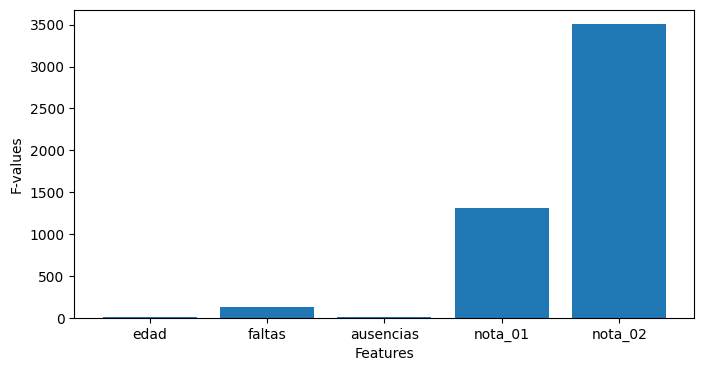

In [ ]:
# plot
def plot(metric, features, name):
  features = features
  fig, ax = plt.subplots(figsize = (8,4))
  ax.bar(np.arange(len(metric)), metric)
  ax.set_xlabel('Features')
  ax.set_ylabel(name)
  ax.set_xticks(np.arange(len(metric)))
  ax.set_xticklabels(features)
  return plt.show()

plot(scores, x_int.columns, 'F-values')

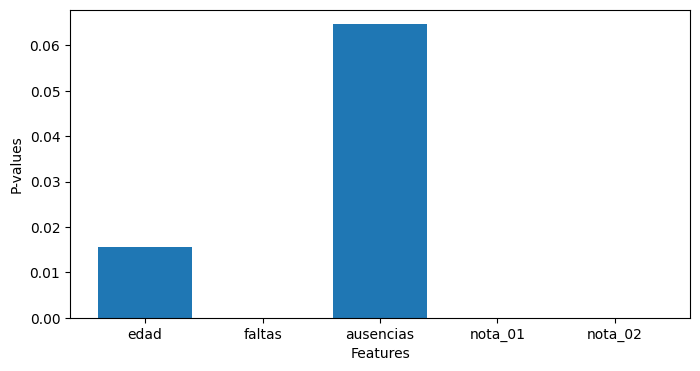

In [ ]:
plot(pvalues, x_int.columns, 'P-values')

Las características con los mayores valores F (y los menores p-values) son las más relevantes para el modelo de regresión. En este caso, nota_01 y nota_02

Mutual_info_regression

In [ ]:
x_new, scores, pvalues = select_kbest(x_int, y, mutual_info_regression, 2) # Obtener columnas seleciconadas - (2 caracteristicas)
df_new = x_int.iloc[:,x_new] # Nuevo conjunto de datos
df_new.head() #se escogen los valores p mas pequeños, y las variables tiene relacion con la variable objetivo

Scores:
 [0.03077772 0.13262894 0.         0.78837823 1.23452769] 
P-values:
 None


,nota_01,nota_02
0,0,11
1,9,11
2,12,13
3,14,14
4,11,13


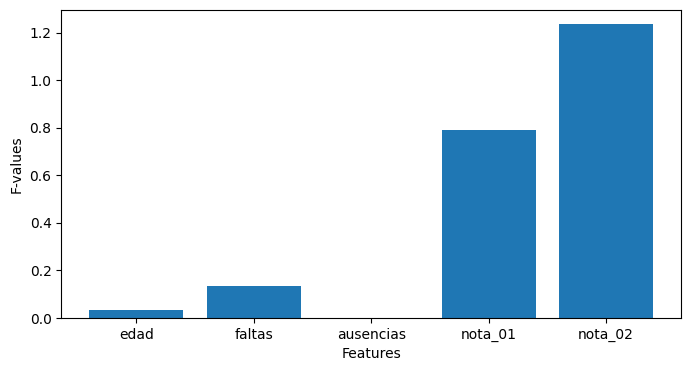

In [ ]:
plot(scores,x_int.columns,'F-values')

'mutual_info_regression' mide la relación entre cada característica y la variable objetivo sin asumir una relación lineal, y nos permite seleccionar características que tienen mayor impacto en la predicción en base a esta medida de dependencia mutua. Para este caso se eligieron nota_01 y nota_02

Coeficiente de Pearsson

Si este coeficiente es igual a 1 o -1 (o cercano a estos valores), significa que una variable es fruto de una transformación lineal de la otra. Teniendo una relación directa al tratarse de 1 (cuando una variable aumenta, la otra también), mientras que existirá una relación inversa al tratarse de -1 (cuando una variable aumenta la otra disminuye).

In [ ]:
x_coef = dfc_01.select_dtypes(include = ["number"]) # filtrar solo variables númericas inclutendo 'nota_03'
scaler = MinMaxScaler() # asignar el tipo de normalización
sv = scaler.fit_transform(x_coef.iloc[:,:]) # normalizar los datos
x_coef.iloc[:,:] = sv # asignar los nuevos datos
x_coef.head()

,edad,faltas,ausencias,nota_01,nota_02,nota_03
0,0.50,1.00,0.27,0.00,0.58,0.58
1,0.33,1.00,0.13,0.47,0.58,0.58
2,0.00,1.00,0.40,0.63,0.68,0.63
3,0.00,1.00,0.00,0.74,0.74,0.74
4,0.17,1.00,0.00,0.58,0.68,0.68


In [ ]:
x_coef.corr(method='pearson')

,edad,faltas,ausencias,nota_01,nota_02,nota_03
edad,1.00,-0.29,0.12,-0.17,-0.10,-0.09
faltas,-0.29,1.00,-0.13,0.38,0.40,0.41
ausencias,0.12,-0.13,1.00,-0.15,-0.11,-0.07
nota_01,-0.17,0.38,-0.15,1.00,0.85,0.82
nota_02,-0.10,0.40,-0.11,0.85,1.00,0.92
nota_03,-0.09,0.41,-0.07,0.82,0.92,1.00


Podemos concluir que las notas tienen una fuerte correlación entre sí, lo que sugiere que las calificaciones de los estudiantes son consistentes en las diferentes evaluaciones.
La edad tiene una correlación negativa leve con las notas, mientras que las faltas tienen una correlación positiva moderada con las calificaciones. Esto podría indicar que los estudiantes más jóvenes y con menos faltas tienden a obtener mejores notas. Las ausencias no parecen estar muy relacionadas con las otras variables, lo que podría significar que los días ausentes no tienen un gran impacto en las calificaciones directamente.

Con ayuda de las anteriores pruebas decidimos seleccionar las variables númericas nota_01 y nota_02.

### Variables categóricas y numéricas

In [ ]:
###Dummización de variables categóricas y normalización de variables numéricas

dfc=dfc_01.copy()
dfc=dfc.drop(['nota_03'],axis=1) #variables de interés para el modelo
def preprocess_features(df):
    # Procesar variables categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        valores = df[col].unique()
        if len(valores) == 2:
            df[col] = df[col].map({valores[0]: 0, valores[1]: 1})
        else:
            # Si hay más de dos categorías, crear dummies
            dummies = pd.get_dummies(df[col], prefix=col, drop_first= False)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    # Procesar columnas booleanas
    boolean_cols = df.select_dtypes(include='bool').columns
    df[boolean_cols] = df[boolean_cols].astype(int)

    # Identificar columnas numéricas
    numcol = [col for col in df.columns if df[col].dtype == "int64"]

    # Aplicar Min-Max Scaling
    scaler = MinMaxScaler()
    df[numcol] = scaler.fit_transform(df[numcol])

    return df

x_features_dum=dfc.copy()
x_features_dum=preprocess_features(x_features_dum)

#### Métodos wrapper



*   Sequential feature selector



Para seleccionar un conjunto óptimo de características (o variables) usando SFS se evaluará evalúa el rendimiento de un modelo de regresión lineal en función del número de características seleccionadas. Se prueban diferentes cantidades de características seleccionadas y, para cada una, se entrenan modelos y se calculan métricas para medir el desempeño.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_features_dum, y, test_size=0.2, random_state=42)

# Rango de número de características a seleccionar
feature_counts = list(range(20,60,10))

# Lista para almacenar los resultados
results = []

for n in feature_counts:
    sfs = SequentialFeatureSelector(LinearRegression(),
                                    n_features_to_select=n,
                                    direction="forward",  # Selección hacia adelante
                                    scoring='r2')

    sfs.fit(X_train, y_train)

    # Transformar el DataFrame con las características seleccionadas
    X_train_new = sfs.transform(X_train)
    X_test_new = sfs.transform(X_test)

    # Entrenar el modelo
    regressor = LinearRegression()
    regressor.fit(X_train_new, y_train)

    #prediccion en el conjunto de prueba
    y_pred = regressor.predict(X_test_new)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)  # R^2
    mse = math.sqrt(mean_squared_error(y_test, y_pred))  # MSE
    mae = mean_absolute_error(y_test, y_pred)  # MAE

    # Guardar el número de características seleccionadas y metricas
    results.append((n, r2,mae,mse))

# convertir a df
df_results = pd.DataFrame(results, columns=['n_features', 'r2_score','mse','mae'])
print(df_results)

   n_features  r2_score  mse  mae
0          20      0.86 0.80 1.26
1          30      0.85 0.82 1.27
2          40      0.85 0.83 1.28
3          50      0.84 0.85 1.31


In [ ]:
# Rango de número de características a seleccionar
feature_counts = list(range(20,60,10))

# Lista para almacenar los resultados
results = []

for n in feature_counts:
    sfs = SequentialFeatureSelector(LinearRegression(),
                                    n_features_to_select=n,
                                    direction="backward",  # Selección hacia adelante
                                    scoring='r2')

    sfs.fit(X_train, y_train)

    # Transformar el DataFrame con las características seleccionadas
    X_train_new = sfs.transform(X_train)
    X_test_new = sfs.transform(X_test)

    # Entrenar el modelo
    regressor = LinearRegression()
    regressor.fit(X_train_new, y_train)

    #prediccion en el conjunto de prueba
    y_pred = regressor.predict(X_test_new)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)  # R^2
    mse = math.sqrt(mean_squared_error(y_test, y_pred))  # MSE
    mae = mean_absolute_error(y_test, y_pred)  # MAE

    # Guardar el número de características seleccionadas y metricas
    results.append((n, r2,mae,mse))

# convertir a df
df_results = pd.DataFrame(results, columns=['n_features', 'r2_score','mse','mae'])
print(df_results)

   n_features  r2_score  mse  mae
0          20      0.87 0.78 1.20
1          30      0.86 0.81 1.24
2          40      0.85 0.82 1.27
3          50      0.85 0.84 1.29


In [ ]:
# Selector secuencias utilizando regresión lineal
sfs = SequentialFeatureSelector(LinearRegression(),
                                n_features_to_select= 40,
                                direction= "forward",  #se selecciona seleccion hacia delante o eliminacion hacia atras
                                scoring='r2')
# Obtener variable seleccionadas
sfs = sfs.fit(x_features_dum, y)
X_new = sfs.support_
df_new = x_features_dum.iloc[:,X_new]
df_new.head()

,sexo,faltas,soporte_edu_extra,soporte_edu_fam,preuniversitario,nota_01,nota_02,madre_edu_6° a 9°,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_Educación superior,padre_edu_Ninguno,madre_trab_en_casa,madre_trab_profesor,madre_trab_salud,padre_trab_en_casa,padre_trab_otro,padre_trab_servicios,razon_habilidad,razon_recomendacion,guardian_otro,t_examen_30 min a 1 hora,t_examen_mas 1 hora,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,relacion_fam_Bueno,relacion_fam_Regular,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Medio,salir_amigos_Muy alto,cons_alcohol_sem_Bajo,cons_alcohol_sem_Medio,cons_alcohol_finde_Alto,cons_alcohol_finde_Bajo,salud_Bueno,salud_Regular
0,0.00,1.00,0.00,0.00,0.00,0.00,0.58,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,0.00,1.00,1.00,1.00,1.00,0.47,0.58,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,0.00,1.00,0.00,0.00,0.00,0.63,0.68,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,0.00,1.00,1.00,1.00,0.00,0.74,0.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,1.00,1.00,1.00,0.00,0.58,0.68,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [ ]:
df_forward=df_new.columns

In [ ]:
# Selector secuencias utilizando regresión lineal
sfs = SequentialFeatureSelector(LinearRegression(),
                                n_features_to_select= 50,
                                direction= "backward",  #se selecciona seleccion hacia delante o eliminacion hacia atras
                                scoring='r2')
# Obtener variable seleccionadas
sfs = sfs.fit(x_features_dum, y)
X_new = sfs.support_
df_new = x_features_dum.iloc[:,X_new]
df_new.head()

,sexo,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,postgrado,ausencias,nota_02,madre_edu_10° a 11°,madre_edu_Educación superior,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_Ninguno,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,guardian_madre,guardian_otro,guardian_padre,t_examen_15 a 30 min,t_examen_30 min a 1 hora,t_examen_menos 15 min,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_mas 10 horas,t_estudio_menos 2 horas,relacion_fam_Bueno,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Muy alto,cons_alcohol_sem_Medio,cons_alcohol_sem_Muy alto,cons_alcohol_sem_Muy bajo,cons_alcohol_finde_Alto,cons_alcohol_finde_Muy alto,salud_Bueno
0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.27,0.58,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.13,0.58,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.40,0.68,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.74,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.68,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [ ]:
df_backward= df_new.columns

In [ ]:
#Variables comunes entre backward y foward
comunes=[]
for x in df_forward:
    if x in df_backward:
        comunes.append(x)

print(comunes)

['sexo', 'faltas', 'soporte_edu_extra', 'soporte_edu_fam', 'nota_02', 'madre_edu_Primaria hasta 5°', 'padre_edu_10° a 11°', 'padre_edu_Ninguno', 'madre_trab_en_casa', 'madre_trab_profesor', 'madre_trab_salud', 'padre_trab_en_casa', 'padre_trab_otro', 'razon_habilidad', 'razon_recomendacion', 'guardian_otro', 't_examen_30 min a 1 hora', 't_estudio_2 a 5 horas', 't_estudio_5 a 10 horas', 'relacion_fam_Bueno', 'tiempo_libre_Alto', 'tiempo_libre_Bajo', 'tiempo_libre_Muy bajo', 'salir_amigos_Alto', 'salir_amigos_Muy alto', 'cons_alcohol_sem_Medio', 'cons_alcohol_finde_Alto', 'salud_Bueno']


In [ ]:
df_comunes = x_features_dum[[col for col in x_features_dum.columns if col in comunes]]
df_comunes['nota_01']=x_features_dum['nota_01']
df_comunes.head()

<ipython-input-82-c3f6fb35d18f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sexo,faltas,soporte_edu_extra,soporte_edu_fam,nota_02,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_Ninguno,madre_trab_en_casa,madre_trab_profesor,madre_trab_salud,padre_trab_en_casa,padre_trab_otro,razon_habilidad,razon_recomendacion,guardian_otro,t_examen_30 min a 1 hora,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,relacion_fam_Bueno,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Muy alto,cons_alcohol_sem_Medio,cons_alcohol_finde_Alto,salud_Bueno,nota_01
0,0.00,1.00,0.00,0.00,0.58,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,1.00,1.00,0.58,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47
2,0.00,1.00,0.00,0.00,0.68,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63
3,0.00,1.00,1.00,1.00,0.74,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74
4,0.00,1.00,1.00,1.00,0.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58


# Arboles de decisión

In [ ]:
print(len(df_comunes.columns))

29


In [ ]:
model = DecisionTreeRegressor(random_state=42)

cv=RepeatedKFold(n_splits=5,n_repeats=2, random_state=42)
scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2',
    'neg_mean_squared_error': 'neg_mean_squared_error'
}

cv_results = cross_validate(model, df_comunes, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

rmse_train= math.sqrt(-cv_results['train_neg_mean_squared_error'].mean())
mae_train=-cv_results['train_neg_mean_absolute_error'].mean()
r2_train=cv_results['train_r2'].mean()

# Rendimiento del modelo
print('Train:')
print('RMSE score train: %.2f' % rmse_train)
print('MAE score train: %.2f' % mae_train)
print('R² score train: %.2f' % r2_train)

rmse_test=math.sqrt(-cv_results['test_neg_mean_squared_error'].mean())
mae_test=-cv_results['test_neg_mean_absolute_error'].mean()
r2_test=cv_results['test_r2'].mean()

print('\nTest:')
print('RMSE score test: %.2f' % rmse_test)
print('MAE score test: %.2f' % mae_test)
print('R2 score test: %.2f' % r2_test)


Train:
RMSE score train: 0.03
MAE score train: 0.00
R² score train: 1.00

Test:
RMSE score test: 1.72
MAE score test: 1.02
R2 score test: 0.71


Este modelo indicó un ajuste casi perfecto en los datos de entrenamiento, con un R2 de 1, lo que sugiere que el modelo explica completamente la variabilidad en esos datos. El MSE y el MAE en entrenamiento son extremadamente bajos (0.03 y 0 respectivamente), esto significa que los errores de predicción en el conjunto de entrenamiento son mínimos. Sin embargo, al evaluar el modelo con los datos de prueba, se observó cierta disminución en el rendimiento, con un R2 de 0.71, MSE de 1.72 y MAE de 1.02, esto indica que aún captura bien la variabilidad pero hay errores más significativos en las predicciones del conjunto de prueba. En este modelo hay un posible sobreajuste, por esto, se procede a realizar el afinamiento de hiperparámetros del modelo.


##**Optimización de hiperparámetros**

Curvas de validación

**Interpretación**:

Las curvas de validación se utilizan para evaluar cómo el rendimiento de un modelo de Machine Learning varía con respecto a un hiperparámetro específico. Estas curvas permiten entender si el modelo está sufriendo de overfitting (sobreajuste) o underfitting (subajuste), y ayudan a seleccionar el valor óptimo de dicho hiperparámetro. En estas se pueden observar:
*   Puntaje en el conjunto de entrenamiento: Esta línea muestra el rendimiento del modelo en los datos de entrenamiento.
*   Puntaje en el conjunto de validación: Esta línea muestra el rendimiento del modelo en los datos de validación (o test, si se prefiere), que no han sido vistos por el modelo durante el entrenamiento.

Ambas líneas se grafican a lo largo de un rango de valores para un hiperparámetro que varía.
El subajuste ocurre cuando el modelo es demasiado simple y no capta las relaciones entre los datos. En las curvas de validación, tanto el puntaje en entrenamiento como el de validación son bajos y están muy cercanos. Esto sugiere que el modelo no está aprendiendo correctamente ni de los datos de entrenamiento ni de los de validación.
El sobreajuste ocurre cuando el modelo es demasiado complejo y se ajusta en exceso a los datos de entrenamiento, capturando ruido o detalles irrelevantes. En las curvas de validación, el puntaje en entrenamiento será muy alto, pero el puntaje en validación será bajo. Esto indica que el modelo está aprendiendo demasiado bien los datos de entrenamiento, pero no está generalizando bien a los datos no vistos.
El modelo óptimo curre cuando el modelo tiene la complejidad adecuada para los datos. En las curvas de validación, los puntajes en entrenamiento y validación son ambos razonablemente altos y están cercanos. Esto indica que el modelo ha logrado un buen equilibrio entre captar patrones importantes y evitar sobreajustarse.
A medida que se ajusta un hiperparámetro, si el puntaje de validación mejora, eso indica que el modelo está aprendiendo mejor. Sin embargo, si después de un punto el puntaje de validación empieza a empeorar mientras el puntaje de entrenamiento sigue mejorando, el modelo ha comenzado a sobreajustar.
Un buen modelo es aquel donde ambas curvas (entrenamiento y validación) se encuentran relativamente cerca y en un nivel alto, lo que indica que el modelo tiene buena capacidad de generalización.

Los hiperparámetros seleccionados para árboles de decisión son:
1.   Min_samples_leaf: Mínimo número de muestras por hoja
2.   Min_samples_split: Mínimo número de muestras para dividir un nodo
3.   Max_leaf_nodes: Número máximo de nodos hoja

1.   Para min_sample_leaf

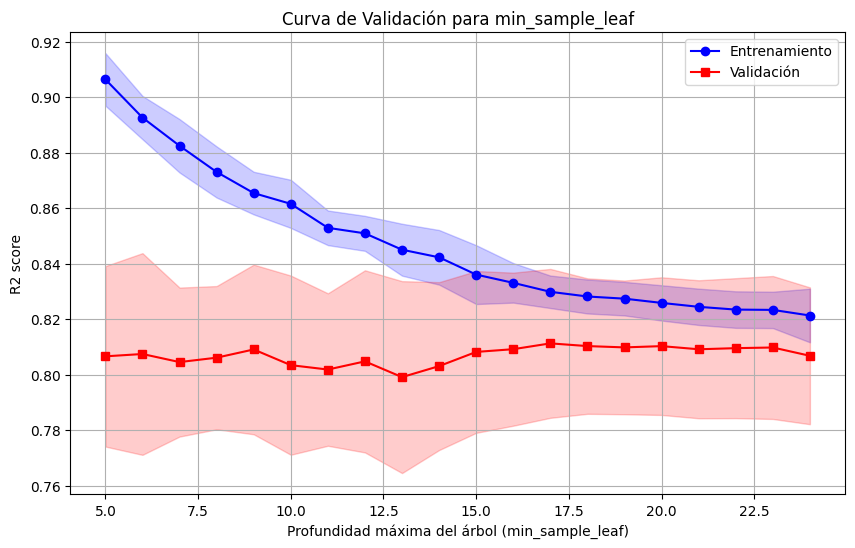

In [ ]:
# Rango de valores
param_range = np.arange(5,25).tolist()[::1]

train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(),
    df_comunes, y,
    param_name="min_samples_leaf",  #Hiperparámetro
    param_range=param_range,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)
# Calcular el promedio y desviación estándar de los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validación", color="red", marker='s')

# Graficar las áreas de desviación estándar
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Personalizar gráfico
plt.title("Curva de Validación para min_sample_leaf")
plt.xlabel("Profundidad máxima del árbol (min_sample_leaf)")
plt.ylabel("R2 score")
plt.legend(loc="best")
plt.grid()
plt.show()

2.   Para min_samples_split

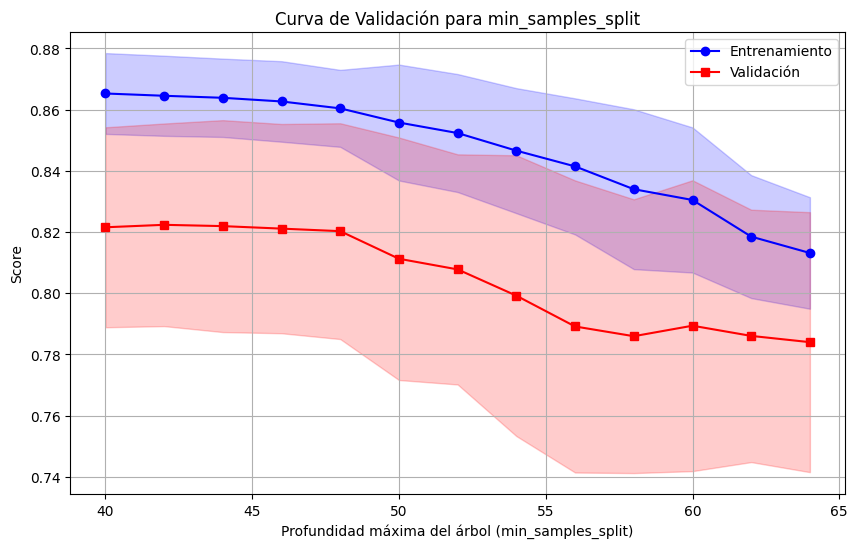

In [ ]:
# Rango de valores
param_range = np.arange(40,65).tolist()[::2]

# Calcular las curvas de validación
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(),
    df_comunes,y,
    param_name="min_samples_split",
    param_range=param_range,
    cv=cv,
    scoring='r2'
)

# Calcular el promedio y desviación estándar de los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validación", color="red", marker='s')

# Graficar las áreas de desviación estándar
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Personalizar gráfico
plt.title("Curva de Validación para min_samples_split")
plt.xlabel("Profundidad máxima del árbol (min_samples_split)")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

3.   Para max_leaf_nodes

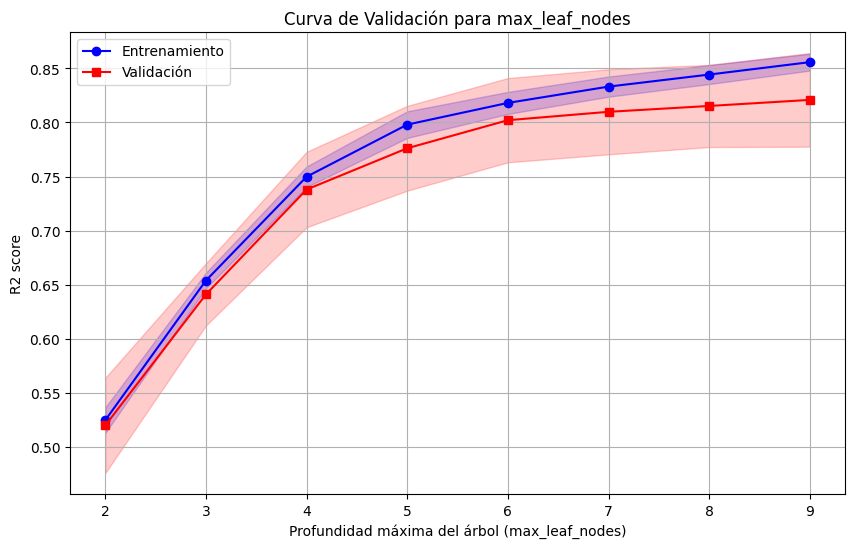

In [ ]:
# Rango de valores
param_range = np.arange(2,10).tolist()[::1]

train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(),
    df_comunes,y,
    param_name="max_leaf_nodes",  #Hiperparámetro
    param_range=param_range,
    cv=cv,
    scoring='r2'
)

# Calcular el promedio y desviación estándar de los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validación", color="red", marker='s')

# Graficar las áreas de desviación estándar
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Personalizar gráfico
plt.title("Curva de Validación para max_leaf_nodes")
plt.xlabel("Profundidad máxima del árbol (max_leaf_nodes)")
plt.ylabel("R2 score")
plt.legend(loc="best")
plt.grid()
plt.show()

##**Tecnicas de ajuste de hiperparámetros**

Si las métricas del conjunto de entrenamiento son mucho mejores que las del conjunto de prueba (por ejemplo, un R² muy alto en entrenamiento pero bajo en prueba), podría ser una señal de sobreajuste.
Si las métricas son similares entre ambos conjuntos, indica que el modelo generaliza bien en datos no vistos.

Si el modelo tiene un buen rendimiento en entrenamiento, pero un mal rendimiento en validación, podría estar ocurriendo sobreajuste, lo que indica que el modelo es demasiado complejo.

Si el modelo tiene un rendimiento pobre tanto en entrenamiento como en validación, indica subajuste, lo que sugiere que el modelo es demasiado simple.

###*Grid Search*

In [ ]:
parameters = {'criterion':['squared_error','absolute_error'],
              'min_samples_split':np.arange(40,65).tolist()[::2], #minima cantidad de muestras que se puede dividir
              'max_leaf_nodes':np.arange(2,10).tolist()[::1], #minima cantidad de nodos de hojas
              'min_samples_leaf':np.arange(5,25).tolist()[::1]} #minima cantidad de nodos de hojas

g2 = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
g2.fit(df_comunes,y)
duration_gs = time.time() - start_time

# show best parameter configuration found for regressor
rgr_params1 = g2.best_params_
rgr_params1

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



{'criterion': 'squared_error',
 'max_leaf_nodes': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 44}

In [ ]:
model_gs = g2.best_estimator_

cv_results_model_gs = cross_validate(model_gs, df_comunes, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

rmse_train_gs=math.sqrt(-cv_results_model_gs['train_neg_mean_squared_error'].mean())
mae_train_gs=-cv_results_model_gs['train_neg_mean_absolute_error'].mean()
r2_train_gs= cv_results_model_gs['train_r2'].mean()

print('Train:')
print('RMSE score train: %.2f' % rmse_train_gs)
print('MAE score train: %.2f' % mae_train_gs)
print('R² score train: %.2f' % r2_train_gs)

rmse_test_gs=math.sqrt(-cv_results_model_gs['test_neg_mean_squared_error'].mean())
mae_test_gs=-cv_results_model_gs['test_neg_mean_absolute_error'].mean()
r2_test_gs= cv_results_model_gs['test_r2'].mean()

print('\nTest:')
print('RMSE score test: %.2f' % rmse_test_gs)
print('MAE score test: %.2f' % mae_test_gs)
print('R2 score test: %.2f' % r2_test_gs)

print('\ncomputation time: %.2f' % duration_gs)

Train:
RMSE score train: 1.29
MAE score train: 0.80
R² score train: 0.84

Test:
RMSE score test: 1.35
MAE score test: 0.85
R2 score test: 0.82

computation time: 692.46


###*Random search*

In [ ]:
parameters = {'criterion':['squared_error','absolute_error'],
              'min_samples_split':np.arange(40,65).tolist()[::2], #minima cantidad de muestras que se puede dividir
              'max_leaf_nodes':np.arange(2,10).tolist()[::1], #minima cantidad de nodos de hojas
              'min_samples_leaf':np.arange(5,25).tolist()[::1]} #minima cantidad de nodos de hojas}

# create an instance of the randomized search object
r2 = RandomizedSearchCV(DecisionTreeRegressor(), parameters, cv=cv, n_iter=100, random_state=42, n_jobs=-1)

# conduct randomized search over the parameter space
start_time = time.time()
r2.fit(df_comunes,y)
duration_rs = time.time() - start_time

# show best parameter configuration found for regressor
rgr_params2 = r2.best_params_
rgr_params2

{'min_samples_split': 40,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 9,
 'criterion': 'absolute_error'}

In [ ]:
model_rs = r2.best_estimator_

cv_results_model_rs = cross_validate(model_rs, df_comunes, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

rmse_train_rs=math.sqrt(-cv_results_model_rs['train_neg_mean_squared_error'].mean())
mae_train_rs=-cv_results_model_rs['train_neg_mean_absolute_error'].mean()
r2_train_rs= cv_results_model_rs['train_r2'].mean()

print('Train:')
print('RMSE score train: %.2f' % rmse_train_rs)
print('MAE score train: %.2f' % mae_train_rs)
print('R² score train: %.2f' % r2_train_rs)

rmse_test_rs=math.sqrt(-cv_results_model_rs['test_neg_mean_squared_error'].mean())
mae_test_rs=-cv_results_model_rs['test_neg_mean_absolute_error'].mean()
r2_test_rs= cv_results_model_rs['test_r2'].mean()

print('\nTest:')
print('RMSE score test: %.2f' % rmse_test_rs)
print('MAE score test: %.2f' % mae_test_rs)
print('R2 score test: %.2f' % r2_test_rs)

print('\ncomputation time: %.2f' % duration_rs)

Train:
RMSE score train: 1.33
MAE score train: 0.69
R² score train: 0.83

Test:
RMSE score test: 1.36
MAE score test: 0.73
R2 score test: 0.82

computation time: 12.96


###*Bayesian search*

In [ ]:
parameters = {'criterion': Categorical(['squared_error','absolute_error']),
              'min_samples_split':np.arange(40,65).tolist()[::2], #minima cantidad de muestras que se puede dividir
              'max_leaf_nodes':np.arange(2,10).tolist()[::1], #minima cantidad de nodos de hojas
              'min_samples_leaf':np.arange(5,25).tolist()[::1]} #numero minimo de muestras en un nodo

# create an instance of the bayesian search object
b2 = BayesSearchCV(DecisionTreeRegressor(), parameters, cv=cv, n_iter=10, random_state=42, n_jobs=-1,return_train_score=True)

# conduct randomized search over the parameter space
start_time = time.time()
b2.fit(df_comunes,y)
duration_bs = time.time() - start_time

# show best parameter configuration found for regressor
rgr_params3 = b2.best_params_
rgr_params3

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



OrderedDict([('criterion', 'squared_error'),
             ('max_leaf_nodes', 9),
             ('min_samples_leaf', 8),
             ('min_samples_split', 44)])

In [ ]:
model_bs = b2.best_estimator_

cv_results_model_bs = cross_validate(model_bs, df_comunes, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

rmse_train_bs=math.sqrt(-cv_results_model_bs['train_neg_mean_squared_error'].mean())
mae_train_bs=-cv_results_model_bs['train_neg_mean_absolute_error'].mean()
r2_train_bs= cv_results_model_bs['train_r2'].mean()

print('Train:')
print('RMSE score train: %.2f' % rmse_train_bs)
print('MAE score train: %.2f' % mae_train_bs)
print('R² score train: %.2f' % r2_train_bs)

rmse_test_bs=math.sqrt(-cv_results_model_bs['test_neg_mean_squared_error'].mean())
mae_test_bs=-cv_results_model_bs['test_neg_mean_absolute_error'].mean()
r2_test_bs= cv_results_model_bs['test_r2'].mean()

print('\nTest:')
print('RMSE score test: %.2f' % rmse_test_bs)
print('MAE score test: %.2f' % mae_test_bs)
print('R2 score test: %.2f' % r2_test_bs)

print('\ncomputation time: %.2f' % duration_bs)

Train:
RMSE score train: 1.31
MAE score train: 0.81
R² score train: 0.84

Test:
RMSE score test: 1.41
MAE score test: 0.87
R2 score test: 0.81

computation time: 2.48


In [ ]:
results_reg = pd.DataFrame([['Modelo base de regresión lineal',RMSE_test_base,RMSE_train_base,(RMSE_train_base-RMSE_test_base)*100,MAE_test_base,MAE_train_base,(MAE_train_base-MAE_test_base)*100,R2_test_base,R2_train_base,(R2_train_base-R2_test_base)*100,np.nan],
    ['Modelo base árbol de decisión(AD)', rmse_test, rmse_train,(rmse_train-rmse_test)*100, mae_test,mae_train,(mae_train-mae_test)*100, r2_test,  r2_train,(r2_train-r2_test)*100, np.nan],
    ['Modelo AD con Grid search', rmse_test_gs, rmse_train_gs,(rmse_train_gs-rmse_test_gs)*100,mae_test_gs, mae_train_gs,(mae_train_gs-mae_test_gs)*100,r2_test_gs,r2_train_gs,(r2_train_gs-r2_test_gs)*100,duration_gs],
    ['Modelo AD con Random search', rmse_test_rs, rmse_train_rs, (rmse_train_rs-rmse_test_rs)*100, mae_test_rs,mae_train_rs,(mae_train_rs-mae_test_rs)*100,r2_test_rs,r2_train_rs,(r2_train_rs-r2_test_rs)*100,duration_rs],
    ['Modelo AD con Bayesian search', rmse_test_bs, rmse_train_bs,(rmse_train_bs-rmse_test_bs)*100,mae_test_bs, mae_train_bs,(mae_train_bs-mae_test_bs)*100,r2_test_bs,r2_train_bs,(r2_train_bs-r2_test_bs)*100, duration_bs]],
             columns = ['Type','RMSE_test','RMSE_train','Diferencia_RMSE','MAE_test', 'MAE_train','Diferencia_MAE','R2_test','R2_train','Diferencia_R2','Duration'])

# Formatear a tres decimales
results_reg = results_reg.round(2)

# Agregar el símbolo de porcentaje a las columnas que empiezan con 'Diferen'
for col in results_reg.columns:
    if col.startswith('Diferen'):
        results_reg[col] = results_reg[col].astype(str) + '%'

results_reg

,Type,RMSE_test,RMSE_train,Diferencia_RMSE,MAE_test,MAE_train,Diferencia_MAE,R2_test,R2_train,Diferencia_R2,Duration
0,Modelo base de regresión lineal,1.25,1.22,-3.85%,0.85,0.80,-4.82%,0.86,0.85,-0.08%,NaN
1,Modelo base árbol de decisión(AD),1.72,0.03,-169.11%,1.02,0.00,-101.98%,0.71,1.00,29.18%,NaN
2,Modelo AD con Grid search,1.35,1.29,-6.33%,0.85,0.80,-4.99%,0.82,0.84,1.68%,692.46
3,Modelo AD con Random search,1.36,1.33,-3.01%,0.73,0.69,-3.89%,0.82,0.83,0.7%,12.96
4,Modelo AD con Bayesian search,1.41,1.31,-9.89%,0.87,0.81,-5.26%,0.81,0.84,2.5%,2.48


### Resultados y comparación de modelos de arboles de decisión para regresión

**Modelo base:**


*    Tiene un RMSE de prueba de 1.25, con una diferencia del -3.85% respecto al RMSE en entrenamiento (1.48), lo que indica que el modelo no está sobreajustado.
*   La diferencia en MAE entre prueba y entrenamiento es de -4.82%, lo que refleja un modelo con buena generalización.
*   Tiene un R2 de prueba de 0.86, cercano al valor de entrenamiento (0.85), con una diferencia mínima de -0.08%, lo que indica un buen ajuste y generalización.

**Modelo con validación cruzada:**


*   Muestra un sobreajuste extremo, ya que el RMSE en entrenamiento es muy bajo (0.03), mientras que en prueba es mucho mayor (1.72), con una diferencia de -169.11%. Esto indica que el modelo no generaliza bien.
*   Tiene una diferencia extremadamente alta (-101.89%), lo que refuerza el problema de sobreajuste.
*   Aunque el R2 de entrenamiento es perfecto (1.00), el de prueba baja a 0.71, con una diferencia significativa de 29.18%, lo que indica sobreajuste.

**Modelo con optimización de hiperparametros:**

Técnicas de ajuste:

*   Grid Search: Reduce la diferencia en RMSE a -6.33%, lo que muestra una mejora significativa en la generalización del modelo, además, mejora la diferencia en MAE a -4.99%, acercándose más a la generalización ideal. Presenta una diferencia en R2 de 1.68%, lo que demuestra una mejora significativa en comparación con la validación cruzada. Es el método más lento, tomando 624.28 segundos para completar.

*   Random Search:  Presenta una diferencia de -3.01% en RMSE, mostrando un rendimiento similar al de Grid Search. Reduce la diferencia en MAE a -3.89%, lo que sugiere que es capaz de equilibrar mejor el error entre entrenamiento y prueba. Reduce aún más la diferencia a 0.7% en el R2, mostrando un excelente equilibrio entre entrenamiento y prueba.  Ofrece una buena combinación de tiempo (24.20 segundos) y rendimiento, siendo considerablemente más rápido que Grid Search.

*   Bayesian Search: Tiene una diferencia de -9.89%, lo que indica un equilibrio adecuado entre entrenamiento y prueba, aunque el RMSE de prueba (1.41) es ligeramente más alto que el de los otros métodos. También tiene una diferencia pequeña (-5.26%) en cuanto al MAE, lo que demuestra un buen rendimiento general. Tiene una diferencia en R2 de 2.5%, lo que lo coloca cerca de Grid Search y Random Search en términos de rendimiento. Es el más rápido (2.62 segundos) pero con un rendimiento ligeramente inferior en comparación con los otros métodos.

**Conclusión final**

Basándonos en las métricas (RMSE, MAE y R2) y el equilibrio entre los valores de entrenamiento y prueba, Random Search parece ser la mejor técnica, ya que logra una diferencia pequeña en RMSE y MAE, y presenta un equilibrio excelente en R2 con un tiempo de ejecución razonable. Aunque Grid Search ofrece métricas similares, su tiempo de ejecución es significativamente más alto, lo que hace que Random Search sea más eficiente.

Además, el modelo con Random Search tiene un menor nivel de sobreajuste en comparación con el modelo con validación cruzada y es muy competitivo respecto al modelo base en términos de RMSE, este modelo también tiene el menor MAE, lo que quiere decir que es más preciso al momento de predecir los valores reales de la variable objetivo. Aunque el modelo base tiene un R2 superior, el modelo con random search tiene un buen balance entre entrenamiento y prueba, podemos concluir que es mas robusto.

El modelo Random Search es mejor debido a su equilibrio entre error y capacidad de generalización, mejorando sobre el modelo base y mostrando mucho mejor rendimiento que el modelo con validación cruzada




# XGBoost

Modelo base XGBoost con Cross-validation

In [ ]:
X = df_comunes #Variables independientes
X.head()

,sexo,faltas,soporte_edu_extra,soporte_edu_fam,nota_02,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_Ninguno,madre_trab_en_casa,madre_trab_profesor,madre_trab_salud,padre_trab_en_casa,padre_trab_otro,razon_habilidad,razon_recomendacion,guardian_otro,t_examen_30 min a 1 hora,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,relacion_fam_Bueno,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Muy alto,cons_alcohol_sem_Medio,cons_alcohol_finde_Alto,salud_Bueno,nota_01
0,0.00,1.00,0.00,0.00,0.58,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,1.00,1.00,0.58,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47
2,0.00,1.00,0.00,0.00,0.68,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63
3,0.00,1.00,1.00,1.00,0.74,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74
4,0.00,1.00,1.00,1.00,0.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58


In [ ]:
y #Variable dependiente

,nota_03
0,11
1,11
2,12
3,14
4,13
...,...
646,9
647,10
648,11
649,11


In [ ]:
# Crear instancia del modelo XGBRegressor
model = XGBRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, random_state =42)

# Definir el tipo de validación cruzada (por ejemplo, 5-fold cross-validation)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2',
    'neg_mean_squared_error': 'neg_mean_squared_error'
}
cv_results = cross_validate(model, X, y, scoring= scoring, cv=cv, n_jobs=-1, return_train_score=True)

rmse_train= math.sqrt(-cv_results['train_neg_mean_squared_error'].mean())
mae_train=-cv_results['train_neg_mean_absolute_error'].mean()
r2_train=cv_results['train_r2'].mean()

# Rendimiento del modelo
print('Train:')
print('RMSE score train: %.2f' % rmse_train)
print('MAE score train: %.2f' % mae_train)
print('R² score train: %.2f' % r2_train)

rmse_test=math.sqrt(-cv_results['test_neg_mean_squared_error'].mean())
mae_test=-cv_results['test_neg_mean_absolute_error'].mean()
r2_test=cv_results['test_r2'].mean()

print('\nTest:')
print('RMSE score test: %.2f' % rmse_test)
print('MAE score test: %.2f' % mae_test)
print('R2 score test: %.2f' % r2_test)


Train:
RMSE score train: 1.06
MAE score train: 0.68
R² score train: 0.89

Test:
RMSE score test: 1.29
MAE score test: 0.79
R2 score test: 0.84


Este modelo presenta un R2 en entrenamiento con buen desempeño, es decir, explica la variabilidad de estos datos en un 89%. En cuanto al MAE, este tiene un valor bajo que indica que, la diferencia absoluta entre las nota_03 real y predicha, es de 0.68. El RMSE especifica que la magnitud promedio de los errores entre la predicción y los valores reales es de 1.06, es decir, qué tan lejos se encuentran las predicciones de los valores reales.

En cuanto a los datos de testeo, se encuentra una explicación de variabilidad del 84%, lo cual sigue siendo bueno; un MAE y RMSE realtivamente normal. La caída entre las métricas de testeo y entrenamiento está entre los rangos de aceptación, el desempeño disminuyó pero no drásticamente, por lo cuál no hay un overfitting. En general, esto puede comprobar que el XGBoost por sí solo es un algoritmo optimizado, sin embargo se procede al afinamiento de hiperparámetros para mejorar aun más el desempeño.

### Optimización de hiperparámetros

Los hiperparámetros seleccionados para el XGBoost fueron elegidos mediante la revisión de literatura, investigación y experimentación con las curvas de aprendizaje. Con el último método se encontraron hiperparámetros donde el entrenamiento y validación llegaban a una casi convergencia. Para la selección de los rangos se tuvieron en cuenta valores comunes y posibles valores que podría tomar cada hiperparámetro. Los elegidos son:

*   learning_rate: Contrae el tamaño del paso utilizado en las actualizaciones para evitar el ajuste excesivo, es decir, controla el tamaño de los pasos hacia la solución.
*   n_estimators: Número de arboles a construir.
*   max_depth: la máxima profundidad de un árbol. Mientras más profundo, más complejo el modelo.

Por otro lado, las curvas de aprendizaje o validación permiten a encontrar los mejores rangos de hiperparámetros en los que el entrenamiento y testeo tienen un mejor desempeño, mejorando el overfitting o el underfitting (bias) del modelo. Todo lo anterior se encuentra explicado en árboles de decisión.




**Curvas de validación**

1. learning_rate

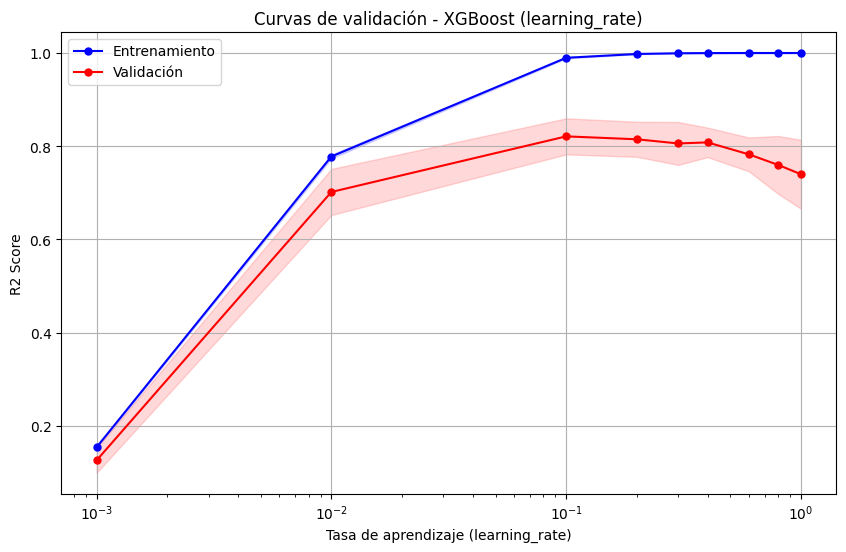

In [ ]:
rango_parametros = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]   # Valores típicos de learning_rate
train_scores, test_scores = validation_curve(
    estimator= make_pipeline(StandardScaler(), XGBRegressor()),
    X=X,
    y=y,
    param_name='xgbregressor__learning_rate',  # Parámetro learning_rate
    param_range=rango_parametros,
    cv=cv,
    scoring='r2')  # Usamos MSE para regresión

    # Convertir a positivo para interpretación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de validación
plt.figure(figsize=(10, 6))
plt.plot(rango_parametros, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(rango_parametros, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rango_parametros, test_mean, color='red', marker='o', markersize=5, label='Validación')
plt.fill_between(rango_parametros, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Curvas de validación - XGBoost (learning_rate)')
plt.xlabel('Tasa de aprendizaje (learning_rate)')
plt.ylabel('R2 Score')
plt.legend(loc='best')
plt.xscale('log')
plt.grid(True)
plt.show()


Este es un buen hiperparámetro para ajustar, pues lleva a la convergencia del puntaje de test y training entre los rangos 0.001 y 0.8. Entre 0.8 y 1, el R2 tiende a disminuir en la validación pero no en entrenamiento, evidenciando el inicio del sobreajuste.

2. n_estimators

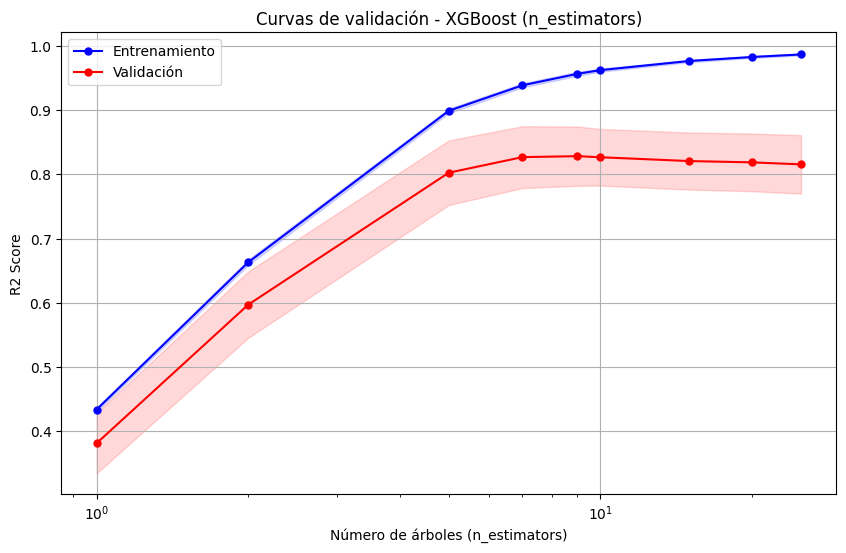

In [ ]:
rango_parametros = rango = [1, 2, 5, 7, 9, 10, 15, 20, 25]   # Valores típicos de learning_rate
train_scores, test_scores = validation_curve(
    estimator= make_pipeline(StandardScaler(), XGBRegressor()),
    X=X,
    y=y,
    param_name='xgbregressor__n_estimators',  # Parámetro learning_rate
    param_range=rango_parametros,
    cv=cv,
    scoring='r2')  # Usamos MSE para regresión

    # Convertir a positivo para interpretación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de validación
plt.figure(figsize=(10, 6))
plt.plot(rango_parametros, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')

plt.fill_between(rango_parametros, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rango_parametros, test_mean, color='red', marker='o', markersize=5, label='Validación')

plt.fill_between(rango_parametros, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Curvas de validación - XGBoost (n_estimators)')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('R2 Score')
plt.legend(loc='best')
plt.xscale('log')
plt.grid(True)
plt.show()

n_estimators indica la cantidad de árboles por crear. En este caso la línea de entrenamiento y prueba tienen en general buen comportamiento de convergencia, destacando los rangos entre 1-15; después de este rango, los dos puntajes comienzan un sobreajuste, específicamente porqué el R2 de testeo disminuye con respecto a los puntajes de entrenamiento que aumentan.

3. Max_depth

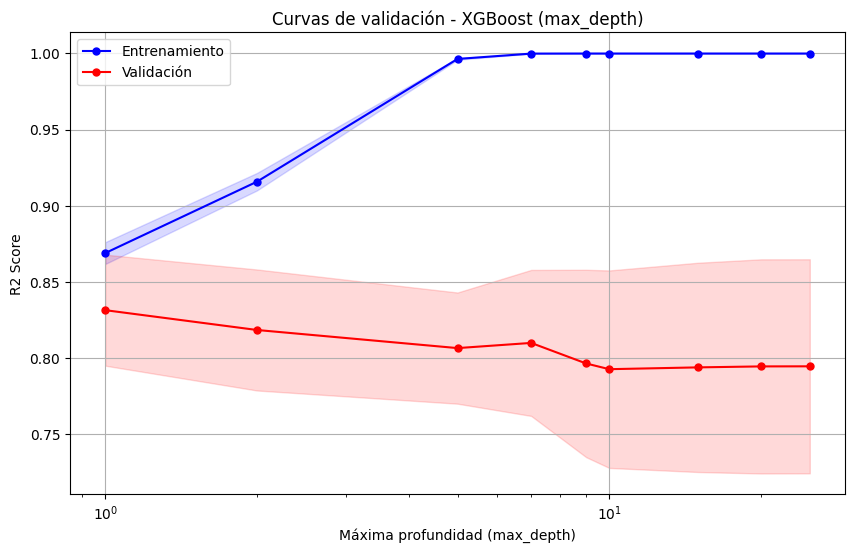

In [ ]:
rango_parametros = rango = [1, 2, 5, 7, 9, 10, 15, 20, 25]   # Valores típicos de max_depth
train_scores, test_scores = validation_curve(
    estimator= make_pipeline(StandardScaler(), XGBRegressor()),
    X=X,
    y=y,
    param_name='xgbregressor__max_depth',  # Parámetro learning_rate
    param_range=rango_parametros,
    cv=cv,
    scoring='r2')  # Usamos R2

    # Convertir a positivo para interpretación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de validación
plt.figure(figsize=(10, 6))
plt.plot(rango_parametros, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')

plt.fill_between(rango_parametros, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rango_parametros, test_mean, color='red', marker='o', markersize=5, label='Validación')

plt.fill_between(rango_parametros, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Curvas de validación - XGBoost (max_depth)')
plt.xlabel('Máxima profundidad (max_depth)')
plt.ylabel('R2 Score')
plt.legend(loc='best')
plt.xscale('log')
plt.grid(True)
plt.show()

Aunque nunca se llega a la convergencia entre los puntajes de entrenamiento y prueba, se pueden evidenciar unos valores donde hay un mejor comportamiento, entre 1 y 10 específicamente. Después de este rango, ambas líneas se estabilizan pero con un notable sobreajuste, donde la variabilidad del entrenamiento es captada casi que perfectamente, por lo que en testeo el desempeño baja.

### **Tecnicas de ajuste de hiperparámetros**

Como es explicado en árboles de decisión, estasa técnicas permiten encotrar el valor de hiperparámetro en el que el modelo de XGBoost, con validación cruzada, tiene mejor desempeño. Se utilizan tres técnicas de optimización de hiperparámertros: Grid Search, Randon Search y Bayesian Search.

Si en los métodos se presenta una caída de desempeño normal, entre testeo y prueba, significa que el modelo generaliza bien y capta la variabilidad de datos con los que no ha entrenado.

#### Grid search

In [ ]:
# Parámetros establecidos para XGBoost
parameters = {
    'max_depth': list(range(1, 8)),
    'learning_rate': np.logspace(np.log10(0.001), np.log10(0.8), num=10), # Tasa de aprendizaje (exploración log-uniforme)
    'n_estimators': list(range(1, 10)),        # Número de árboles
}

# create an instance of the grid search object
g1 = GridSearchCV(XGBRegressor(), parameters, cv=cv, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
g1.fit(X,y)
duration_gs = time.time() - start_time

# show best parameter configuration found for regressor
rgr_params1 = g1.best_params_
rgr_params1

{'learning_rate': 0.38064877183786194, 'max_depth': 3, 'n_estimators': 9}

In [ ]:
# Desempeño con grid search
model_gs = g1.best_estimator_

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

cv_results_model_gs = cross_validate(model_gs, df_comunes, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

mse_train_gs=math.sqrt(-cv_results_model_gs['train_neg_mean_squared_error'].mean())
mae_train_gs=-cv_results_model_gs['train_neg_mean_absolute_error'].mean()
r2_train_gs= cv_results_model_gs['train_r2'].mean()

print('Train:')
print('MSE score train: %.2f' % mse_train_gs)
print('MAE score train: %.2f' % mae_train_gs)
print('R² score train: %.2f' % r2_train_gs)

mse_test_gs=math.sqrt(-cv_results_model_gs['test_neg_mean_squared_error'].mean())
mae_test_gs=-cv_results_model_gs['test_neg_mean_absolute_error'].mean()
r2_test_gs= cv_results_model_gs['test_r2'].mean()

print('\nTest:')
print('MSE score test: %.2f' % mse_test_gs)
print('MAE score test: %.2f' % mae_test_gs)
print('R2 score test: %.2f' % r2_test_gs)

print('\ncomputation time: %.2f' % duration_gs)

Train:
MSE score train: 1.05
MAE score train: 0.68
R² score train: 0.89

Test:
MSE score test: 1.29
MAE score test: 0.79
R2 score test: 0.84

computation time: 692.46


#### Random search

In [ ]:
# setup parameter space
parameters = {
    'max_depth': list(range(1, 8)),
    'learning_rate': np.logspace(np.log10(0.001), np.log10(0.8), num=10), # Tasa de aprendizaje (exploración log-uniforme)
    'n_estimators': list(range(1, 10)),        # Número de árboles
}

r1 = RandomizedSearchCV(XGBRegressor(), parameters, cv=cv, random_state=42, n_jobs=-1)

# conduct randomized search over the parameter space
start_time = time.time()
r1.fit(X,y)
duration_rs = time.time() - start_time

# show best parameter configuration found for regressor
rgr_params2 = r1.best_params_
rgr_params2

{'n_estimators': 4, 'max_depth': 6, 'learning_rate': 0.38064877183786194}

In [ ]:
# Desempeño con random search
model_rs = r1.best_estimator_

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

cv_results_model_rs = cross_validate(model_rs, df_comunes, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

mse_train_rs=math.sqrt(-cv_results_model_rs['train_neg_mean_squared_error'].mean())
mae_train_rs=-cv_results_model_rs['train_neg_mean_absolute_error'].mean()
r2_train_rs= cv_results_model_rs['train_r2'].mean()

print('Train:')
print('MSE score train: %.2f' % mse_train_rs)
print('MAE score train: %.2f' % mae_train_rs)
print('R² score train: %.2f' % r2_train_rs)

mse_test_rs=math.sqrt(-cv_results_model_rs['test_neg_mean_squared_error'].mean())
mae_test_rs=-cv_results_model_rs['test_neg_mean_absolute_error'].mean()
r2_test_rs= cv_results_model_rs['test_r2'].mean()

print('\nTest:')
print('MSE score test: %.2f' % mse_test_rs)
print('MAE score test: %.2f' % mae_test_rs)
print('R2 score test: %.2f' % r2_test_rs)

print('computation time: %.2f' % duration_rs)


Train:
MSE score train: 0.98
MAE score train: 0.68
R² score train: 0.91

Test:
MSE score test: 1.40
MAE score test: 0.89
R2 score test: 0.81
computation time: 7.55


#### Bayesian

In [ ]:
# setup parameter space
parameters = {
    'max_depth': list(range(1, 8)),
    'learning_rate': np.logspace(np.log10(0.001), np.log10(0.8), num=10), # Tasa de aprendizaje (exploración log-uniforme)
    'n_estimators': list(range(1, 10)),        # Número de árboles
}

b1 = BayesSearchCV(XGBRegressor(), parameters, cv=cv, n_iter=10, random_state=42, n_jobs=-1)

# conduct randomized search over the parameter space
start_time = time.time()
b1.fit(X,y)
duration_bs = time.time() - start_time

# show best parameter configuration found for regressor
rgr_params3 = b1.best_params_
rgr_params3

OrderedDict([('learning_rate', 0.8), ('max_depth', 5), ('n_estimators', 8)])

In [ ]:
# Desempeño con grandom search
model_rs = b1.best_estimator_
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

cv_results_model_rs = cross_validate(model_rs, df_comunes, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

mse_train_bs=math.sqrt(-cv_results_model_rs['train_neg_mean_squared_error'].mean())
mae_train_bs=-cv_results_model_rs['train_neg_mean_absolute_error'].mean()
r2_train_bs= cv_results_model_rs['train_r2'].mean()

print('Train:')
print('MSE score train: %.2f' % mse_train_bs)
print('MAE score train: %.2f' % mae_train_bs)
print('R² score train: %.2f' % r2_train_bs)

mse_test_bs=math.sqrt(-cv_results_model_rs['test_neg_mean_squared_error'].mean())
mae_test_bs=-cv_results_model_rs['test_neg_mean_absolute_error'].mean()
r2_test_bs= cv_results_model_rs['test_r2'].mean()

print('\nTest:')
print('MSE score test: %.2f' % mse_test_bs)
print('MAE score test: %.2f' % mae_test_bs)
print('R2 score test: %.2f' % r2_test_bs)


print('\ncomputation time: %.2f' % duration_bs)

Train:
MSE score train: 0.58
MAE score train: 0.43
R² score train: 0.97

Test:
MSE score test: 1.51
MAE score test: 0.93
R2 score test: 0.78

computation time: 10.83


Resultados

In [ ]:
results_reg_XG = pd.DataFrame([['Modelo base de regresión lineal',RMSE_test_base,RMSE_train_base,(RMSE_train_base-RMSE_test_base)*100,MAE_test_base,MAE_train_base,(MAE_train_base-MAE_test_base)*100,R2_test_base,R2_train_base,(R2_train_base-R2_test_base)*100,np.nan],
    ['Modelo base XGBoost', rmse_test, rmse_train,(rmse_train-rmse_test)*100, mae_test,mae_train,(mae_train-mae_test)*100, r2_test,  r2_train,(r2_train-r2_test)*100, np.nan],
    ['Modelo XGBoost con Grid search', mse_test_gs, mse_train_gs,(mse_train_gs-mse_test_gs)*100,mae_test_gs, mae_train_gs,(mae_train_gs-mae_test_gs)*100,r2_test_gs,r2_train_gs,(r2_train_gs-r2_test_gs)*100,duration_gs],
    ['Modelo XGBoost con Random search', mse_test_rs, mse_train_rs, (mse_train_rs-mse_test_rs)*100, mae_test_rs,mae_train_rs,(mae_train_rs-mae_test_rs)*100,r2_test_rs,r2_train_rs,(r2_train_rs-r2_test_rs)*100,duration_rs],
    ['Modelo XGBoost con Bayesian search', mse_test_bs, mse_train_bs,(mse_train_bs-mse_test_bs)*100,mae_test_bs, mae_train_bs,(mae_train_bs-mae_test_bs)*100,r2_test_bs,r2_train_bs,(r2_train_bs-r2_test_bs)*100, duration_bs]],
             columns = ['Type','RMSE_test','RMSE_train','Diferencia_RMSE','MAE_test', 'MAE_train','Diferencia_MAE','R2_test','R2_train','Diferencia_R2','Duration'])

# Formatear a tres decimales
results_reg_XG = results_reg_XG.round(2)

# Agregar el símbolo de porcentaje a las columnas que empiezan con 'Diferen'
for col in results_reg_XG.columns:
    if col.startswith('Diferen'):
        results_reg_XG[col] = results_reg_XG[col].astype(str) + '%'

results_reg_XG

,Type,RMSE_test,RMSE_train,Diferencia_RMSE,MAE_test,MAE_train,Diferencia_MAE,R2_test,R2_train,Diferencia_R2,Duration
0,Modelo base de regresión lineal,1.25,1.22,-3.85%,0.85,0.80,-4.82%,0.86,0.85,-0.08%,NaN
1,Modelo base XGBoost,1.29,1.06,-22.99%,0.79,0.68,-10.43%,0.84,0.89,5.15%,NaN
2,Modelo XGBoost con Grid search,1.29,1.05,-24.08%,0.79,0.68,-10.24%,0.84,0.89,5.33%,692.46
3,Modelo XGBoost con Random search,1.40,0.98,-42.01%,0.89,0.68,-21.43%,0.81,0.91,9.45%,7.55
4,Modelo XGBoost con Bayesian search,1.51,0.58,-92.65%,0.93,0.43,-49.89%,0.78,0.97,18.67%,10.83


### Resultados y comparación de modelos de XGBoost para regresión

**Modelo base regresión lineal:**

El modelo base de regresión lineal presenta una diferencia de R2 de -0.08%, lo que significa que hay una caída normal y no se encuentra sobreajustado, hay buena generalización.
El MAE no tiene una diferencia dramática, lo que signficia que el error absoluto entre datos reales y predichos, de entrenamiento y test, es muy parecido y demuestra que el modelo es capaz de predecir sin sobreajuste.
Con la diferencia de MSE se demuestra que el modelo se ajusta bien a ambos data sets.

**Modelo XGBoost con validación cruzada:**

Este modelo muestra resultados muy favorables, donde hay buena generalización y captación de la varaibilidad de los datos. No hay sobreajuste, de hecho la caída es buena en cada una de las métricas. El modelo explica un 89% de la variabilidad de datos de entrenamiento y 84% de los datos de entrenamiento, capta bien las relaciones que se encuentran en los datos. El MAE presenta una desviación de 0.68 unidades en entrenamiento y 0.79 unidades en testeo de los valores reales. El RMSE indica un buen ajuste de datos, un bajo error de predicción.

**Grid Search:** Esta técnica es la que mayor capacidad de computo necesitó, con una duración de 246.17 segundos. Al igual que el modelo base, presenta métricas con buen desempeño. El R2 es alto, no hay overfitting ni caídas drásticas. El MAE comparte características con el modelo base. El RMSE sí presenta diferencias un poco más altas, pero no significativas, el error promedio es muy cercano.

**Random Search:** Aunque las métricas de este modelo son buenas, sí podría presentarse un posible sobreajuste. La diferencia del R2 es de 9.45%, siendo más alta que el de Grid search, lo que significa que hay una mejor adaptación a los datos de entrenamiento, pero un peor desempeño en los datos de testeo. El MAE y RMSE presentan un aumento en la diferencia de las métricas de testeo y entrenamiento, lo que podría indicar un menor equilibrio. Es una buena opción si se compara tiempo computacional y resultados.

**Bayesian Search:** Este modelo es el que presenta mayor sobreajuste. El R2 tiene excelente desempeño con los datos de entrenamiento, pero al momento del testeo, tiene una caída del 18.67%, lo que indica que no hay generalización. El MAE Y MSE tienen un aunmento en la diferencia de casi el doble, el error y la desviación con los datos de testeo es la más alta comparada con otros modelos presentados.

**Conclusión final**

Teniendo en cuenta las métricas presentadas (RMSE, MAE, R2 y tiempo computacional) y el equilibrios entre los valores de entrenamiento y prueba, el mejor modelo es el base de XGBoost con validación cruzada. Aunque las métricas del Grid Search son casi que idénticas al del modelo base, el tiempo computacional es bastante importante. El Grid search se demora 4 minutos aproximadamente en arrojar una respuesta, mientras que el modelo base fue entrenado de manera instantanea.

El modelo base tiene unas buenas métricas, una caída razonable y generaliza adecuadamente. No hay un sobreajuste ni subajuste.

El peor modelo sería el Bayesiano pues se adapta muy bien a los datos de entrenamiento, pero en los de testeo el desempeño disminuye significativamente. Tiene un tiempo computacional más alto que random search, pero no de manera drástica. El modelo con Random Search podría ser una opción en caso de que no sea admitido el base o el modelo con Gridge search.